## **Context** 
**In terms of productivity, engagement, retention, and business outcomes, employee performance is the key factor that determines an organization's success. It is critical for organisations to comprehend the factors that influence employee performance and attrition as well as how these factors relate to other employee attributes including role, education, and job satisfaction.**

**This dataset contains all the information required to identify the employees, including demographics, job roles, performance ratings, compensation-related information, and even job satisfaction indicators that can be used to identify underlying trends or insights. Additionally, organisations can utilise this information to make informed decisions about performance management, retention tactics, and hiring.**

**The aim of this research is to determine and examine the most crucial elements.**

**Know your data**

**import necessary libraries**

In [7]:
#import essential libraries
import numpy as np
import pandas as pd

#Importing Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [9]:
df=pd.read_csv("Employee_Performance.csv")

**Dataset First View**

In [11]:
df.head()     

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


**Dataset Rows & Columns count**

In [13]:
print(df.shape)

(1200, 28)


**Dataset Information**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

**Duplicate Values**

In [17]:
len(df[df.duplicated()])

0

**Missing Values/Null Values**

In [20]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

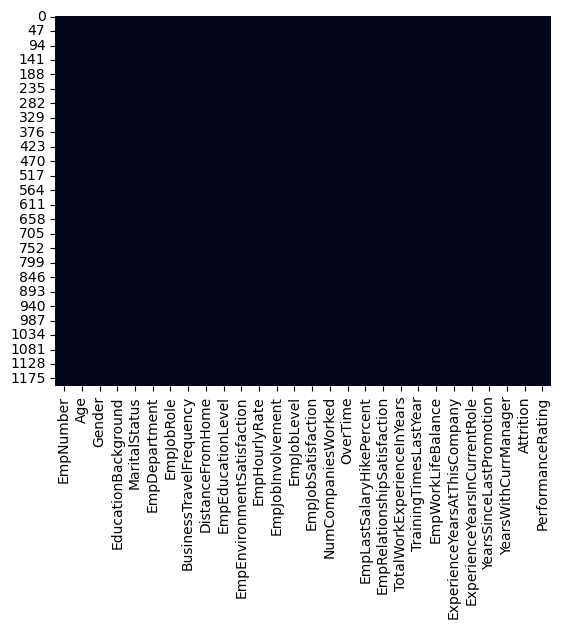

In [22]:
sns.heatmap(df.isnull(), cbar=False);

**What did you know about your dataset?**

 These observation can be concluded from the above analysis:

1.There are 1200 observation and 28 features with a mixture of interger and object data type i.e., contains both numerical and categorial feature.


2.Dataset contains all unique value i.e., there is no duplicate which means data is free from bias.


**2. Understanding Your Variables**

In [24]:
print("Features:",df.columns.to_list())

Features: ['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 'PerformanceRating']


In [26]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## Variables Description

* **EmpNumber**:An Employee ID, sometimes known as an Employee Number or Employee Code, is a unique number assigned to every individual staff member in a company.
* **Age**:Age of the employee in years
* **Gender**:Gender of employee [Male/Female]
* **EducationBackground**:The employee's education level (from 1 to 5, which may indicate a low education for the former and a high education for the latter).
* **MaritalStatus**:Civil status, or marital status, are the distinct options that describe a person's relationship with a significant other
* **EmpDepartment**:Department specifice of employee
* **EmpJobRole**:The role or designation of the employee (e.g., Business Analyst, Developer, Manager).
* **BusinessTravelFrequency**:The employee travel for comapny buisness purpose.
* **DistanceFromHome**:Distance between home to company of employee.
* **EmpEducationLevel**:Employee Education level means the academic qualification. For example, it could be a diploma, degree, masters or PhD.
* **EmpEnvironmentSatisfaction**:satisfied or content employees are with elements like their jobs, their employee experience, and the organizations they work for.
* **EmpHourlyRate**:Hourly Rate means the amount paid to an employee for each hour worked.
* **EmpJobInvolvement**:Job involvement refers to a state of psychological identification with work—or the degree to which a job is central to a person's identity. From an organizational point of view, it has been considered the secret to unlocking employee motivation and productivity.
* **EmpJobLevel**:Employee position in the firm (1-5; entry-level is level 1 and top management is level 5).
* * **EmpJobSatisfaction**:employee's satisfaction with the job(on a scale of 1 to 4).
* **NumCompaniesWorked**:employee worked in how many companies.
* **OverTime**:employee work overtime or not. [Yes, No]
* **EmpLastSalaryHikePercent**:salary hike percent of employee in last year.
* **EmpRelationshipSatisfaction**:Healthy relationships may motivate employees and increase morale. When employees cast aside relationship issues, they can focus on work tasks more effectively.
* **TotalWorkExperienceInYears**:Total experience of employee in years.
* **TrainingTimesLastYear**:Total training done by employee in last year.
* **EmpWorkLifeBalance**:The work-life balance score for the employee (on a scale of 1 to 4).
* **ExperienceYearsAtThisCompany**:total no of experience at current company.
* **ExperienceYearsInCurrentRole**:Total no of experience in current job role.
* **YearsSinceLastPromotion**:Total no of year since last promotion of employee.
* **YearsWithCurrManager**:Employee total no of years with current manager.
* **Attrition**:Whether the employee left the company or not (Yes/No).
* **PerformanceRating**:The performance rating of the employee (typically on a scale from 1 to 5, where higher values indicate better performance).

**Check Unique Values for each variable**

In [29]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in EmpNumber is 1200
No. of unique values in Age is 43
No. of unique values in Gender is 2
No. of unique values in EducationBackground is 6
No. of unique values in MaritalStatus is 3
No. of unique values in EmpDepartment is 6
No. of unique values in EmpJobRole is 19
No. of unique values in BusinessTravelFrequency is 3
No. of unique values in DistanceFromHome is 29
No. of unique values in EmpEducationLevel is 5
No. of unique values in EmpEnvironmentSatisfaction is 4
No. of unique values in EmpHourlyRate is 71
No. of unique values in EmpJobInvolvement is 4
No. of unique values in EmpJobLevel is 5
No. of unique values in EmpJobSatisfaction is 4
No. of unique values in NumCompaniesWorked is 10
No. of unique values in OverTime is 2
No. of unique values in EmpLastSalaryHikePercent is 15
No. of unique values in EmpRelationshipSatisfaction is 4
No. of unique values in TotalWorkExperienceInYears is 40
No. of unique values in TrainingTimesLastYear is 7
No. of unique values i

**3. DATA WRANGLING**

**PLOTS USED:**

**continuous features**

* histogram: A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis. The vertical y-axis represents the number count or percentage of occurrences in the data for each column.
* lineplots:A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

**Discrete and Categorical**

* Countplot: countplot is used to Show the counts of observations in each categorical bin using bars.

## 1.What is the mean and std of EmpHourlyRate?

In [33]:
df['EmpHourlyRate'].agg(['mean','std'])

mean    65.981667
std     20.211302
Name: EmpHourlyRate, dtype: float64

## 2.What is the average  EmpLastSalaryHikePercent for employees who have worked more than 10 years in the company?

In [35]:
df[df['ExperienceYearsAtThisCompany']>10]['EmpLastSalaryHikePercent'].mean()

15.29611650485437

## 3.Analyze the distribution of TotalWorkExperienceInYears

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


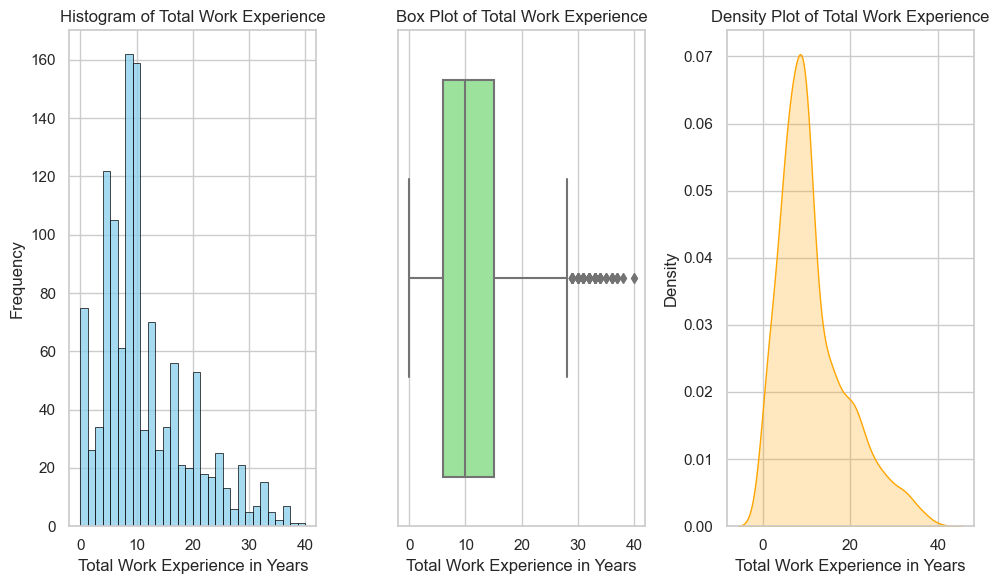

In [187]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['TotalWorkExperienceInYears'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Work Experience')
plt.xlabel('Total Work Experience in Years')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['TotalWorkExperienceInYears'], color='lightgreen')
plt.title('Box Plot of Total Work Experience')
plt.xlabel('Total Work Experience in Years')

plt.subplot(1, 3, 3)
sns.kdeplot(df['TotalWorkExperienceInYears'], fill=True, color='orange')
plt.title('Density Plot of Total Work Experience')
plt.xlabel('Total Work Experience in Years')

plt.tight_layout()
plt.show()

 ## **Observation**:
 Work experience range between 0 to 40,Most of the employee experience ranges between 5 to 10.

## 4.What is the 25th,50th,75th percentile of TotalWorkExperienceInYears?

In [37]:
a= df['TotalWorkExperienceInYears'].quantile(0.25)
b= df['TotalWorkExperienceInYears'].quantile(0.50) 
c = df['TotalWorkExperienceInYears'].quantile(0.75)
print("25th percentile:",a)
print("50th percentile (Median):",b)
print("75th percentile:",c)

25th percentile: 6.0
50th percentile (Median): 10.0
75th percentile: 15.0


## 5.Is there a correlation between ExperienceYearsAtThisCompany and PerformanceRating?

In [39]:
correlation = df['ExperienceYearsAtThisCompany'].corr(df['PerformanceRating'])
print("correlation between ExperienceYearsAtThisCompany and PerformanceRating",correlation)

correlation between ExperienceYearsAtThisCompany and PerformanceRating -0.11164534236127023


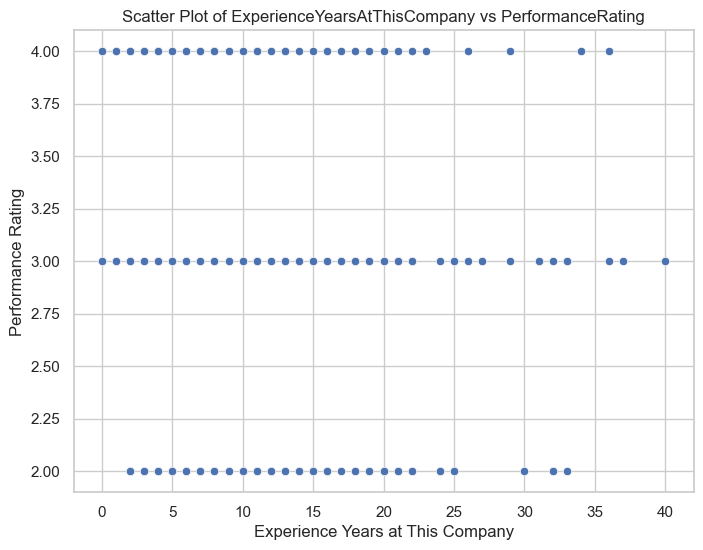

In [189]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='ExperienceYearsAtThisCompany', y='PerformanceRating', data=df)
plt.title('Scatter Plot of ExperienceYearsAtThisCompany vs PerformanceRating')
plt.xlabel('Experience Years at This Company')
plt.ylabel('Performance Rating')
plt.show()

## **Observation**: 
A correlation value of -0.1116 indicates a very weak negative correlation between ExperienceYearsAtThisCompany and PerformanceRating.This weak negative correlation suggests that the number of years an employee has worked at the company is not a reliable predictor of their performance rating, and other factors should likely be explored to understand employee performance more comprehensively.

## 6.Analyze the relationship between EmpJobSatisfaction and EmpEnvironmentSatisfaction.

In [43]:
correlation = df['EmpJobSatisfaction'].corr(df['EmpEnvironmentSatisfaction'])
print("correlation between Job Satisfaction and Environment Satisfaction:",correlation)

correlation between Job Satisfaction and Environment Satisfaction: -0.004319050906079067


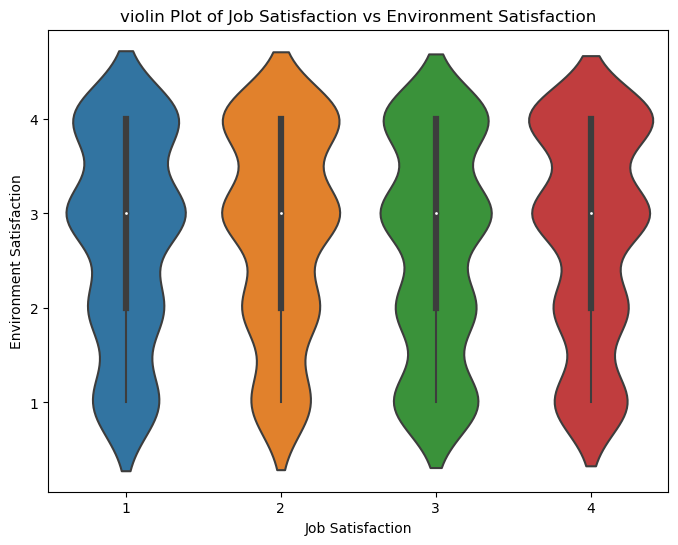

In [45]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='EmpJobSatisfaction', y='EmpEnvironmentSatisfaction', data=df)
plt.title('violin Plot of Job Satisfaction vs Environment Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Environment Satisfaction')
plt.show()

## **Observation:**
The value of -0.0043 is extremely close to 0, which means there is virtually no linear relationship between EmpJobSatisfaction and EmpEnvironmentSatisfaction.In other words, an employee's job satisfaction does not appear to predict their environment satisfaction 

## 7.Calculate the average YearsWithCurrManager by EmpJobRole

In [47]:
avg_years= df.groupby('EmpJobRole')['YearsWithCurrManager'].mean()
print(avg_years)

EmpJobRole
Business Analyst             3.250000
Data Scientist               3.800000
Delivery Manager             6.000000
Developer                    3.889831
Finance Manager              4.428571
Healthcare Representative    4.696970
Human Resources              3.466667
Laboratory Technician        3.046875
Manager                      6.137255
Manager R&D                  4.148936
Manufacturing Director       5.424242
Research Director            6.157895
Research Scientist           3.272727
Sales Executive              4.692593
Sales Representative         1.695652
Senior Developer             4.269231
Senior Manager R&D           4.200000
Technical Architect          2.000000
Technical Lead               3.973684
Name: YearsWithCurrManager, dtype: float64


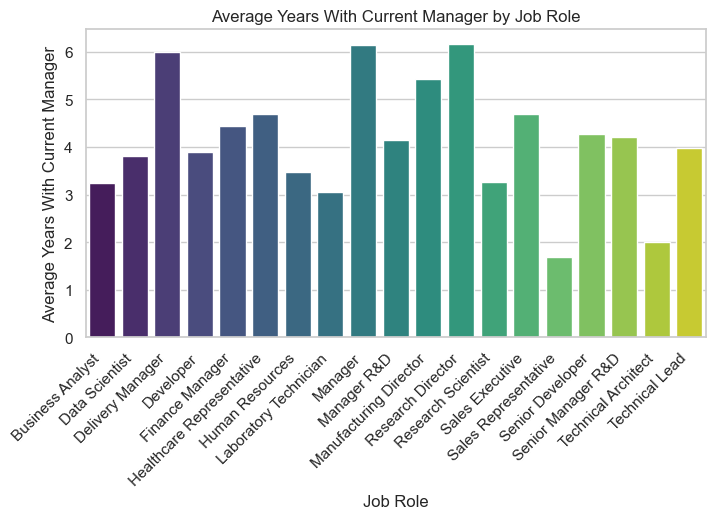

In [191]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_years.index, y=avg_years.values, palette='viridis')
plt.title('Average Years With Current Manager by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Years With Current Manager')
plt.xticks(rotation=45, ha='right')
plt.show()

## **Observation:**
* The occupations with the highest average performance ratings—Manager (6.14), Manager R&D (6.16), and Research Director (6.16)—indicate that people in these roles—possibly in leadership or research-focused positions—generally perform well.
* The Healthcare Representative (4.70) performs relatively well. The average value may imply an excellent performance if interacting with a customer is very crucial at that level
* Although they are not on top of the scale, ratings for data scientist (3.80), developer (3.89), and finance manager (4.43) are decent enough to reflect that, on average, technical or managerial professions receive higher ratings than non-technical positions.
* The lowest average performance rating, sales representative with 1.70, could indicate that the position is hard to meet the performance standards or has a higher turnover rate.

## 8.What is the average EmpEnvironmentSatisfaction score for employees with Attrition marked as "Yes"?

In [51]:
df_yes = df[df['Attrition'] == 'Yes']
average= df_yes['EmpEnvironmentSatisfaction'].mean()
print("The average EmpEnvironmentSatisfaction score for employees with Attrition = 'Yes' is:",average)

The average EmpEnvironmentSatisfaction score for employees with Attrition = 'Yes' is: 2.393258426966292


## **Observation**
With an average score of 2.39, this suggests that, on average, employees who left the company were dissatisfied with their work environment. This score is closer to 2 (Dissatisfied) than to 3 (Satisfied), which points to the fact that work environment dissatisfaction might be a factor contributing to employee attrition.

## 9.Compare the mean YearsSinceLastPromotion for employees with and without Attrition.

In [53]:
mean_years = df.groupby('Attrition')['YearsSinceLastPromotion'].mean()
print(mean_years)

Attrition
No     2.271037
Yes    1.752809
Name: YearsSinceLastPromotion, dtype: float64


## **Observation:**
* The employees who remained in the company (Attrition = "No") have an average of 2.27 years since their last promotion.
* Employees who recently left the firm (Attrition = "Yes") have average 1.75 years of service since most recent promotion.
  
Based on the comparison of the mean YearsSinceLastPromotion for employees with and without attrition, we can infer that employees who have been with the company longer without receiving a promotion may be more likely to leave.



## 10.Does NumCompaniesWorked affect the likelihood of a higher PerformanceRating?

**By visualisation**

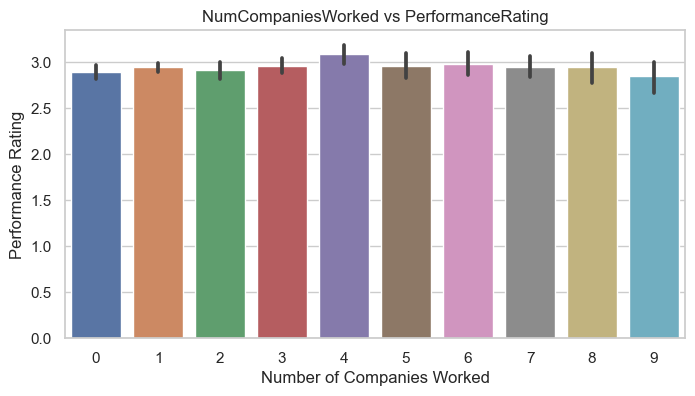

In [193]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='NumCompaniesWorked', y='PerformanceRating')
plt.title('NumCompaniesWorked vs PerformanceRating')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Performance Rating')
plt.show()

**By Corelation**

The correlation coefficient, which gauges the direction and strength of a link, might then be computed between NumCompaniesWorked and PerformanceRating. A positive connection would imply that a higher performance rating is associated with a greater number of firms worked for, whilst a negative correlation would suggest the opposite.

In [57]:
correlation = df['NumCompaniesWorked'].corr(df['PerformanceRating'])
print("Correlation between NumCompaniesWorked and PerformanceRating",correlation)

Correlation between NumCompaniesWorked and PerformanceRating 0.020979618743500426


## **Observation:**
No correlation (close to 0) suggests that there is no linear relationship between these two variables(NumCompaniesWorked and PerformanceRating)

## 11.How does the frequency of business travel impact attrition rates?

In [197]:
a= df.groupby('BusinessTravelFrequency')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
a['AttritionRate'] = a['Yes']

print(a[['AttritionRate']])


Attrition                AttritionRate
BusinessTravelFrequency               
Non-Travel                    0.068182
Travel_Frequently             0.234234
Travel_Rarely                 0.138298


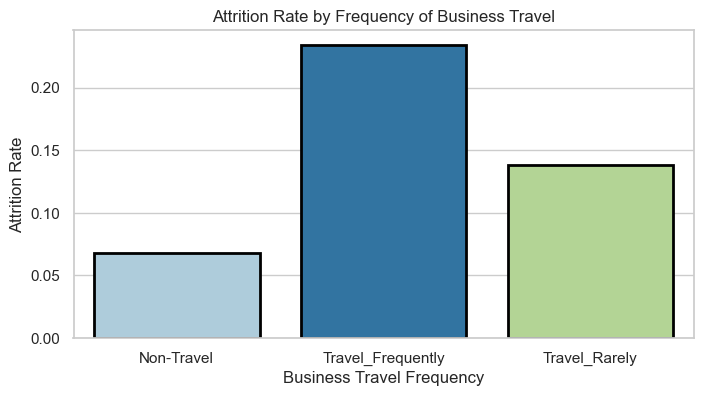

In [199]:
plt.figure(figsize=(8,4))
sns.barplot(x=a.index, y=a['AttritionRate'],palette='Paired',linewidth=2,edgecolor="black")
plt.title('Attrition Rate by Frequency of Business Travel')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Attrition Rate')
plt.show()

## **Observation:**
Employees who have to travel often might have a high attrition rate. This can be because traveling often can present a lot of work-life conflict, stress, and fatigue at work.

## 12.Does employee age or years of experience correlate with performance rating?

**By Corelation**

In [63]:
exp_corr = df['TotalWorkExperienceInYears'].corr(df['PerformanceRating'])
print("Correlation between TotalWorkExperienceInYears and PerformanceRating",exp_corr)

age_corr = df['Age'].corr(df['PerformanceRating'])
print("Correlation between Age and PerformanceRating",age_corr)

Correlation between TotalWorkExperienceInYears and PerformanceRating -0.06814118450453534
Correlation between Age and PerformanceRating -0.04016414988720251


**By Visualisation**

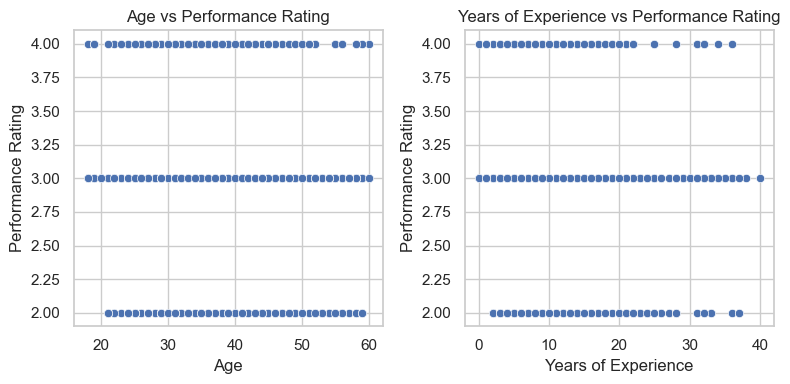

In [201]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Age'], y=df['PerformanceRating'])
plt.title('Age vs Performance Rating')
plt.xlabel('Age')
plt.ylabel('Performance Rating')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['TotalWorkExperienceInYears'], y=df['PerformanceRating'])
plt.title('Years of Experience vs Performance Rating')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Rating')

plt.tight_layout()
plt.show()

## **Observation:**
* 1. **Age and Performance Ratings:** Poor or No Relationship: In most situations, age is poorly or unrelated to performance ratings. This would mean that the age factor is not related to the way workers are rated based on their performance. More so, ratings would depend on other factors like skills, contributions, and roles performed in jobs.
* 2. **Years of Experience and Performance Ratings:** If the correlation between years of experience and performance ratings is weak or near zero, then it may be that other factors, such as motivation, training, role fit, and work environment, are more important in determining performance than the amount of experience an employee has.

## 13.How does job satisfaction relate to performance ratings?

In [67]:
job_groups = df.groupby('EmpJobSatisfaction')['PerformanceRating'].mean()
print(job_groups)


EmpJobSatisfaction
1    2.969697
2    2.953586
3    2.898305
4    2.978836
Name: PerformanceRating, dtype: float64


In [69]:
job_corr = df['EmpJobSatisfaction'].corr(df['PerformanceRating'])
print("Correlation between Job Satisfaction and Performance Rating:",job_corr)


Correlation between Job Satisfaction and Performance Rating: 0.0006059418771469986


## 14.Which departments have the highest attrition rates?

In [71]:
a = df.groupby('EmpDepartment')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
a['Attrition Rate'] = a['Yes'] * 100
a= a[['Attrition Rate']].sort_values('Attrition Rate', ascending=False)
print(a)

Attrition               Attrition Rate
EmpDepartment                         
Sales                        18.766756
Human Resources              14.814815
Development                  14.127424
Research & Development       12.827988
Data Science                 10.000000
Finance                       6.122449


## **Observation:**
The Sales department has the highest attrition rate at 18.77%, which suggests that employee turnover is particularly high in this department. 

## 15.Is there a difference in performance ratings across different job roles or departments?

In [73]:
avg= df.groupby('EmpJobRole')['PerformanceRating'].mean()
print("average performance by job role",avg)
print()
avg_department = df.groupby('EmpDepartment')['PerformanceRating'].mean()
print("average performance rating by department",avg_department)

average performance by job role EmpJobRole
Business Analyst             3.187500
Data Scientist               3.050000
Delivery Manager             3.000000
Developer                    3.105932
Finance Manager              2.775510
Healthcare Representative    2.848485
Human Resources              2.911111
Laboratory Technician        2.859375
Manager                      2.960784
Manager R&D                  2.936170
Manufacturing Director       2.969697
Research Director            2.894737
Research Scientist           2.961039
Sales Executive              2.855556
Sales Representative         2.869565
Senior Developer             3.000000
Senior Manager R&D           2.800000
Technical Architect          3.000000
Technical Lead               3.078947
Name: PerformanceRating, dtype: float64

average performance rating by department EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926

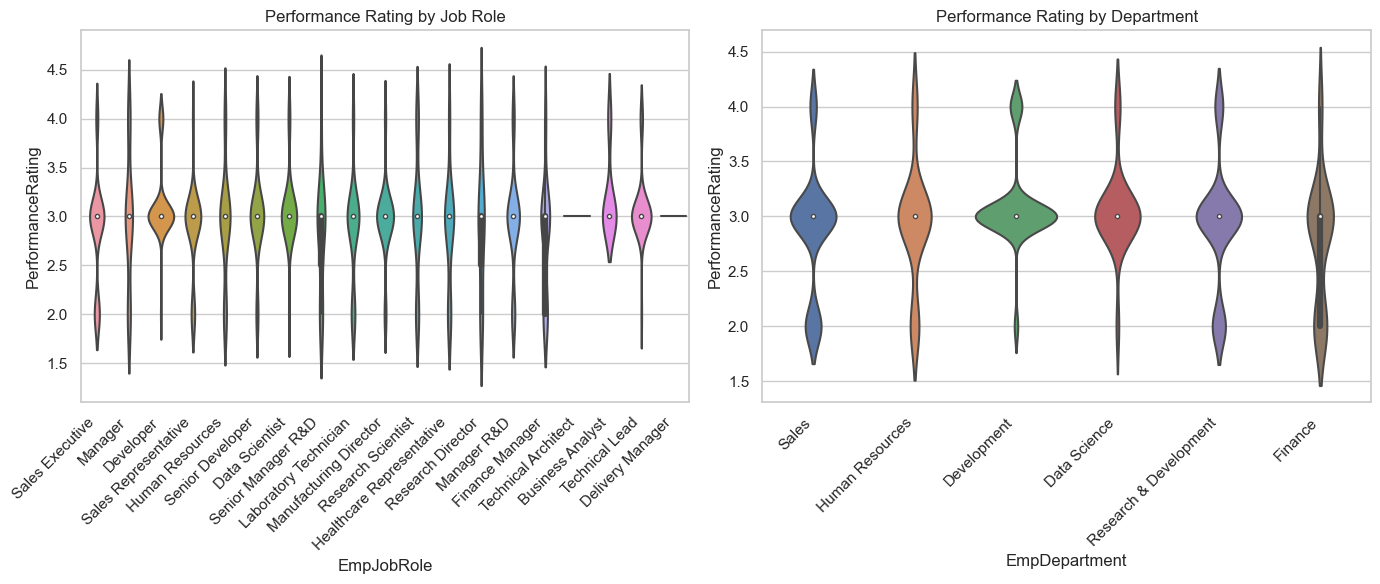

In [75]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(x='EmpJobRole', y='PerformanceRating', data=df, ax=axes[0])
axes[0].set_title('Performance Rating by Job Role')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.violinplot(x='EmpDepartment', y='PerformanceRating', data=df, ax=axes[1])
axes[1].set_title('Performance Rating by Department')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## **Observation:**
**1. Average Performance Ratings by Job Role**

The job of Business Analyst has the highest rating of average performance with a score of 3.19. This could imply that employees are doing good work on this job role due to well-defined expectations in the workplace or powerful work as business operations analysts and support to make decisions. The lowest average performance rating is for the Finance Manager, scoring 2.78, indicating that employees in this role are probably experiencing some form of difficulty or perhaps the performance expectations in finance are much higher and, therefore, difficult to achieve.

**2.Average Performance Ratings by Department:**

The Development department boasts the highest average performance rating at 3.09. This is consistent with the fact that technical roles are often clear in terms of performance metrics, with better ratings. The Finance department, for example, seems to have the lowest average performance and can be rated at 2.78. It is either because the roles of finance carry huge stakes and pressures, or perhaps they are very strict concerning the performance within the department.

## 16.How does work-life balance vary across departments?

EmpDepartment
Data Science              2.500000
Development               2.686981
Finance                   2.673469
Human Resources           2.925926
Research & Development    2.743440
Sales                     2.796247
Name: EmpWorkLifeBalance, dtype: float64


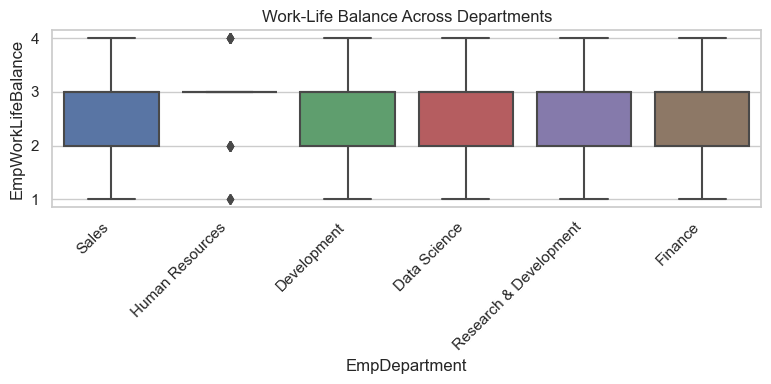

In [203]:
avg= df.groupby('EmpDepartment')['EmpWorkLifeBalance'].mean()
print(avg)

plt.figure(figsize=(8,4))
sns.boxplot(x='EmpDepartment', y='EmpWorkLifeBalance', data=df)
plt.xticks(rotation=45, ha='right')  
plt.title('Work-Life Balance Across Departments')
plt.tight_layout()
plt.show()


## **Observation:**
At 2.93, the HR department had the highest average work-life balance score. Accordingly, employees in human resources departments typically enjoy a comparatively better work-life balance than those in other departments.


## 17.What is the relationship between job satisfaction and relationship satisfaction?

In [82]:
correlation = df['EmpJobSatisfaction'].corr(df['EmpRelationshipSatisfaction'])
print("The correlation between job satisfaction and relationship satisfaction is",correlation)

The correlation between job satisfaction and relationship satisfaction is -0.022027608220205688


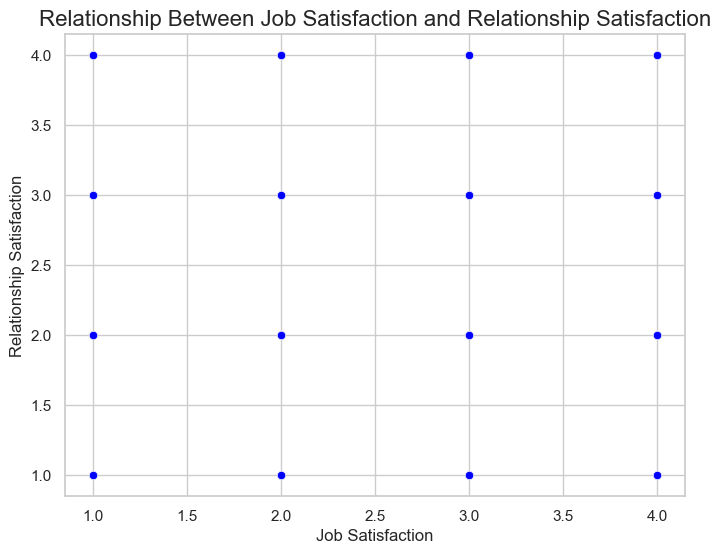

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='EmpJobSatisfaction', y='EmpRelationshipSatisfaction', color='blue')
plt.title('Relationship Between Job Satisfaction and Relationship Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Relationship Satisfaction', fontsize=12)

plt.show()

<Axes: xlabel='EmpJobSatisfaction', ylabel='EmpRelationshipSatisfaction'>

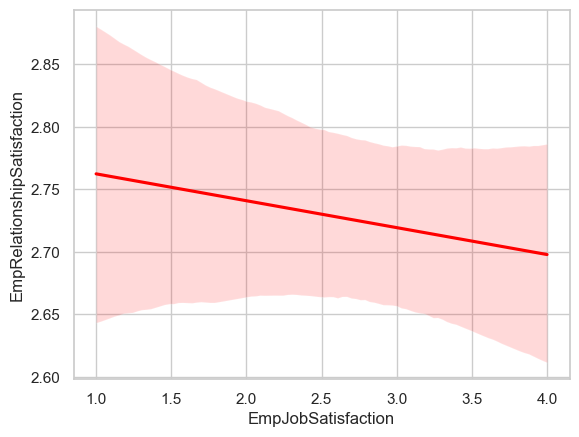

In [84]:
sns.regplot(data=df, x='EmpJobSatisfaction', y='EmpRelationshipSatisfaction', scatter=False, line_kws={'color': 'red'})

## **Observation:**
* **By corelation**

Despite having a tiny negative correlation, it is essentially negligible because it is so near zero. Accordingly, for this dataset, lower job satisfaction does not always translate into lower relationship happiness, and higher job satisfaction does not always translate into higher relationship satisfaction.
To put it another way, in this situation, relationship and work satisfaction appear to function mainly separately.

* **By Visualisation**
  
The scatter plot and regplot will visually confirm  that job satisfaction and relationship satisfaction have little to no correlation in this particular datase

## 18.Does training frequency impact job involvement or satisfaction levels?

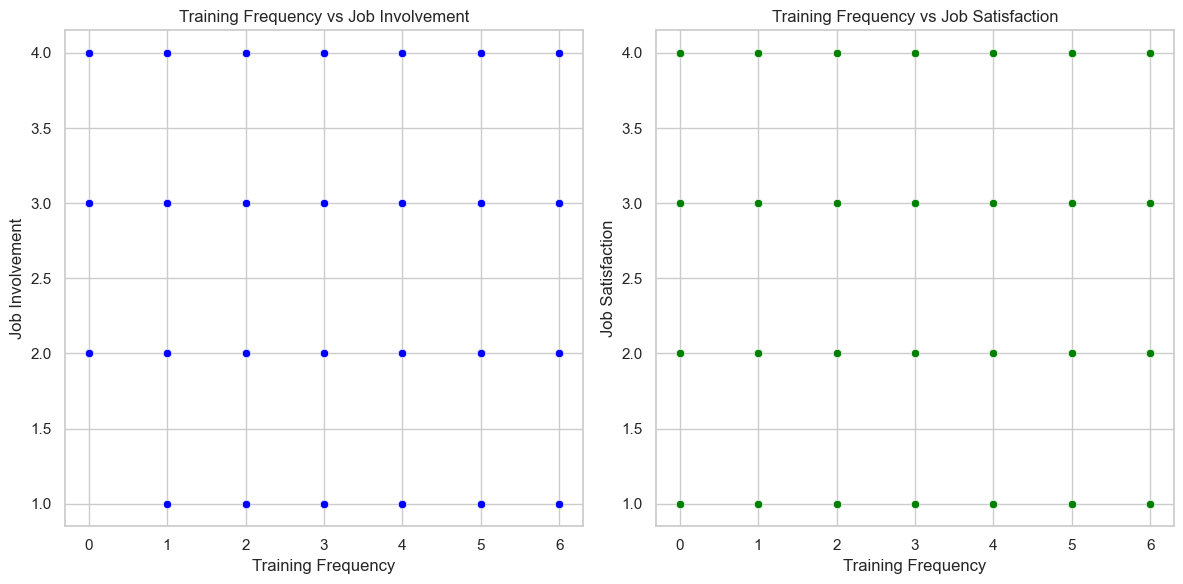

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='TrainingTimesLastYear', y='EmpJobInvolvement', color='blue')
plt.title('Training Frequency vs Job Involvement')
plt.xlabel('Training Frequency')
plt.ylabel('Job Involvement')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='TrainingTimesLastYear', y='EmpJobSatisfaction', color='green')
plt.title('Training Frequency vs Job Satisfaction')
plt.xlabel('Training Frequency')
plt.ylabel('Job Satisfaction')

plt.tight_layout()
plt.show()

In [88]:
cor_involvement = df['TrainingTimesLastYear'].corr(df['EmpJobInvolvement'])
cor_satisfaction = df['TrainingTimesLastYear'].corr(df['EmpJobSatisfaction'])

print("Correlation between Training Frequency and Job Involvement",cor_involvement)
print("Correlation between Training Frequency and Job Satisfaction",cor_satisfaction)

Correlation between Training Frequency and Job Involvement -0.025168121169776448
Correlation between Training Frequency and Job Satisfaction -0.028031055300883543


## **Observation:**
Both correlation coefficients are very close to zero and negative, which indicates that there is a very weak negative relationship between training frequency and both job involvement and job satisfaction.

## 19.How does work-life balance affect employee attrition?

In [90]:
a= df.groupby('Attrition')['EmpWorkLifeBalance'].mean()
print(a)

Attrition
No     2.764188
Yes    2.629213
Name: EmpWorkLifeBalance, dtype: float64


**By Visualisation**

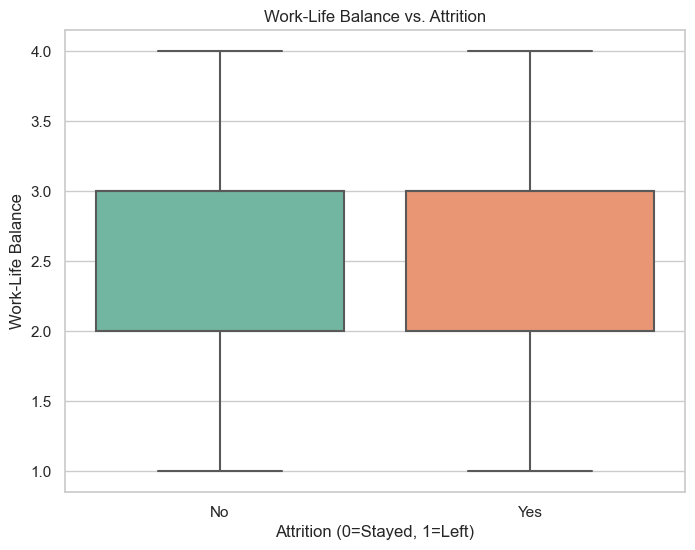

In [92]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='EmpWorkLifeBalance', palette='Set2')
plt.title('Work-Life Balance vs. Attrition')
plt.xlabel('Attrition (0=Stayed, 1=Left)')
plt.ylabel('Work-Life Balance')
plt.show()

## **Observation:**
For mean work-life balance scores by status of attrition, based on the results :

* Employees who remain (Attrition = "No") have on average a 2.76 work-life balance score.
* The average work-life balance score among the employees who left is 2.63, and in Attrition, "Yes".
  
This means that employees who left this company, compared to those staying in the firm, have shown, on average, a work-life balance reported as slightly lesser. However, the difference is still small as regards work-life balance scores among those who leave and those staying

## 20.How do years since last promotion impact employee satisfaction and attrition?

In [94]:
a= df.groupby('EmpJobSatisfaction')['YearsSinceLastPromotion'].mean()
print("Average Years Since Last Promotion by Job Satisfaction:")
print(a)
print()
b = df.groupby('Attrition')['YearsSinceLastPromotion'].mean()
print("Average Years Since Last Promotion by Attrition:")
print(b)


Average Years Since Last Promotion by Job Satisfaction:
EmpJobSatisfaction
1    2.303030
2    2.156118
3    2.110169
4    2.230159
Name: YearsSinceLastPromotion, dtype: float64

Average Years Since Last Promotion by Attrition:
Attrition
No     2.271037
Yes    1.752809
Name: YearsSinceLastPromotion, dtype: float64


**By Visualisation**

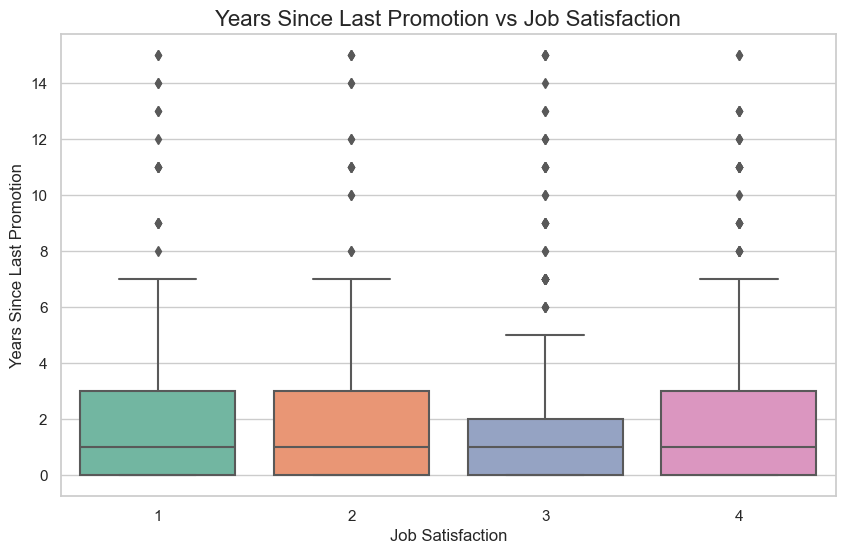

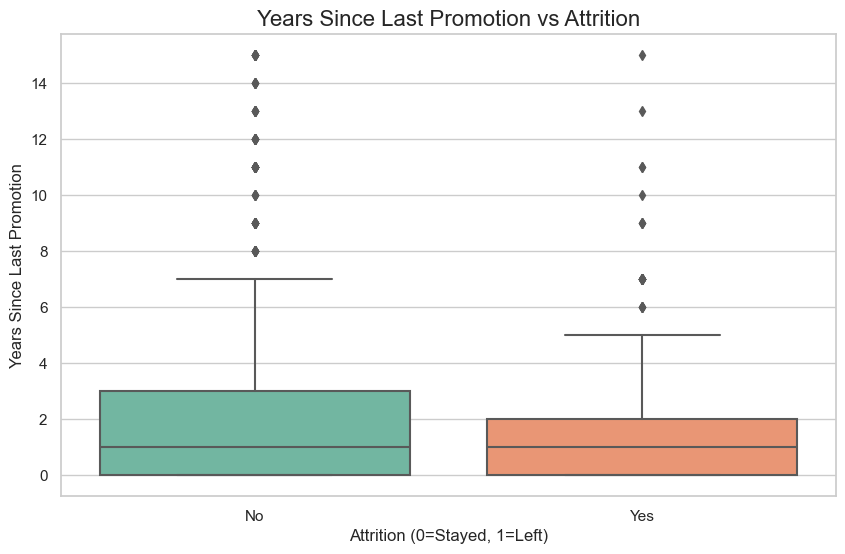

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EmpJobSatisfaction', y='YearsSinceLastPromotion', data=df, palette='Set2')
plt.title('Years Since Last Promotion vs Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Years Since Last Promotion', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df, palette='Set2')
plt.title('Years Since Last Promotion vs Attrition', fontsize=16)
plt.xlabel('Attrition (0=Stayed, 1=Left)', fontsize=12)
plt.ylabel('Years Since Last Promotion', fontsize=12)
plt.show()


## **Obseravtion:**
**1.Average Years Since Last Promotion by Job Satisfaction:**
* Employees with Job Satisfaction = 1 (Very Dissatisfied) have been waiting for a promotion for an average of 2.30 years.
* Employees with Job Satisfaction = 2 (Dissatisfied) have been waiting for a promotion for an average of 2.16 years.
* Employees with Job Satisfaction = 3 (Neutral) have been waiting for a promotion for an average of 2.11 years.
* Employees with Job Satisfaction = 4 (Satisfied) have been waiting for a promotion for an average of 2.23 years.

**2.Average Years Since Last Promotion by Attrition:**
* Employees who left the company (Attrition = "Yes") have been waiting for a promotion for an average of 1.75 years.
* Employees who stayed with the company (Attrition = "No") have been waiting for a promotion for an average of 2.27 years.
                                                                                   

## 21.What is the relationship between job level and performance rating?

In [98]:
a = df.groupby('EmpJobLevel')['PerformanceRating'].mean()
print("Average Performance Rating by Job Level:")
print(a)


Average Performance Rating by Job Level:
EmpJobLevel
1    2.993182
2    2.947846
3    2.890173
4    2.888889
5    2.875000
Name: PerformanceRating, dtype: float64


 * **By Visualisation**

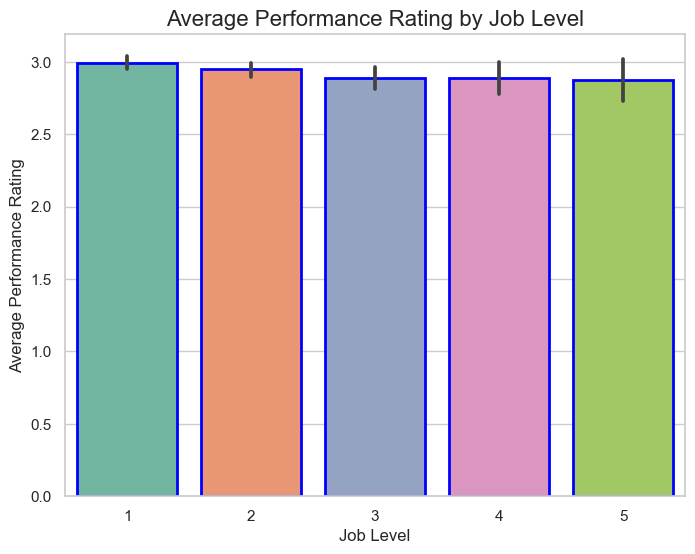

In [205]:
plt.figure(figsize=(8, 6))
sns.barplot(x='EmpJobLevel', y='PerformanceRating', data=df, palette='Set2',linewidth=2,edgecolor='blue')
plt.title('Average Performance Rating by Job Level', fontsize=16)
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Average Performance Rating', fontsize=12)
plt.show()


## **Observation:**
* There is a minor decline in the average performance rating as employees progress from Job Level 1 to Job Level 5, from entry-level up to executive/managerial levels.
* The employees in the Job Level 1 have the highest average rating at performance with 2.993, and in contrast, employees at the job level of 5 (executive/managerial) show the lowest average rating of 2.875.
* Mean performance ratings also differ little by job level: the differences range from 2.875 to 2.993. This says that the performance ratings are not dramatically different between the job levels.

## 22.Do employees with more frequent promotions have better performance ratings?

In [102]:
a= df.groupby('YearsSinceLastPromotion')['PerformanceRating'].mean()
print("Average Performance Rating by Years Since Last Promotion")
print(a)


Average Performance Rating by Years Since Last Promotion
YearsSinceLastPromotion
0     3.123667
1     2.898990
2     2.763780
3     2.777778
4     2.773585
5     2.828571
6     2.833333
7     2.854839
8     2.545455
9     2.687500
10    2.600000
11    2.826087
12    2.666667
13    3.125000
14    3.000000
15    2.909091
Name: PerformanceRating, dtype: float64


* **By Visualisation**

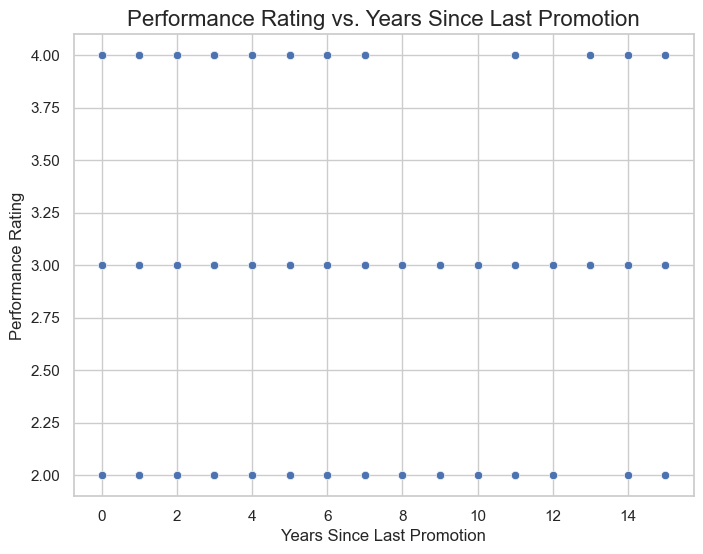

In [207]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsSinceLastPromotion', y='PerformanceRating', data=df)
plt.title('Performance Rating vs. Years Since Last Promotion', fontsize=16)
plt.xlabel('Years Since Last Promotion', fontsize=12)
plt.ylabel('Performance Rating', fontsize=12)
plt.show()

## **Observation:**
* The average performance rating for the most recently promoted employees is highest at 3.12 because they have been promoted just 0 years ago. This would mean that newly promoted individuals normally come with a high rating, since fresh new employees who are recently promoted might still be newly rewarded for their input or for being optimistic regarding their promotion.
* After the first year, the rating of performance declined for the employees of 1 to 3 years since their previous promotion. Its rating ranges from 2.76 to 2.90. The downward trend can explain that effect of promotion makes a drop after the first stage of promotion by raising the standard or failing in adjustment to higher roles or bigger responsibilities.
* Ratings increase once more after 5-7 years and are between 2.83 and 2.85. This may be an implication of stable performance among employees after settling in their jobs and gaining experience.
* There is a marked decline in performance ratings after 8-10 years since promotion, with ratings as low as 2.55 for 8 years. This may indicate that employees with long intervals since their last promotion are facing challenges, such as complacency, lack of new career challenges, or stagnation in their roles.
* Interestingly, employees who have been 13-14 years since their last promotion have increased ratings, at 3.13 for 13 years and 3.00 for 14 years. This could be due to long employees being valued because of experience, stability, or leadership in the organization.

## 23.Is there a correlation between last salary hike percentage and job satisfaction?

In [106]:
correlation = df['EmpLastSalaryHikePercent'].corr(df['EmpJobSatisfaction'])
print("Correlation between Last Salary Hike Percentage and Job Satisfaction",correlation)


Correlation between Last Salary Hike Percentage and Job Satisfaction 0.03184702528894032


In [108]:
a= df.groupby('EmpLastSalaryHikePercent')['EmpJobSatisfaction'].mean()
print("Average Job Satisfaction by Last Salary Hike Percentage:")
print(a)

Average Job Satisfaction by Last Salary Hike Percentage:
EmpLastSalaryHikePercent
11    2.686391
12    2.716129
13    2.702381
14    2.779070
15    2.670732
16    2.588235
17    2.671642
18    2.958904
19    2.714286
20    2.860000
21    2.529412
22    2.829787
23    2.761905
24    3.055556
25    2.769231
Name: EmpJobSatisfaction, dtype: float64


## **Observation:**
* The correlation value of 0.0318 is very close to 0, which suggests that the relationship between salary hikes and job satisfaction is almost negligible.
* High Job Satisfaction at Specific Hike Percentages (24%)
* Moderate Satisfaction with Hikes Around 18-20%
* Low Satisfaction for Smaller Hikes (11%-16%)

## 24.How does the hourly rate vary with employee education or job level?

In [110]:
a= df.groupby('EmpEducationLevel')['EmpHourlyRate'].mean()
print("Average Hourly Rate by Education Level:")
print(a)
print()
b= df.groupby('EmpJobLevel')['EmpHourlyRate'].mean()
print("Average Hourly Rate by Job Level:")
print(b)


Average Hourly Rate by Education Level:
EmpEducationLevel
1    65.162162
2    66.472803
3    65.581292
4    66.403727
5    67.119048
Name: EmpHourlyRate, dtype: float64

Average Hourly Rate by Job Level:
EmpJobLevel
1    66.647727
2    65.993197
3    63.942197
4    66.177778
5    66.642857
Name: EmpHourlyRate, dtype: float64


**By Visualisation**

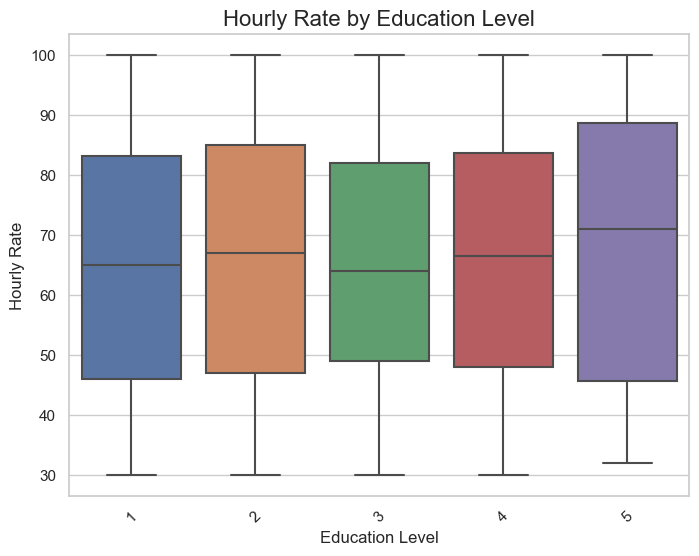

In [209]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EmpEducationLevel', y='EmpHourlyRate', data=df)
plt.title('Hourly Rate by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Hourly Rate', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


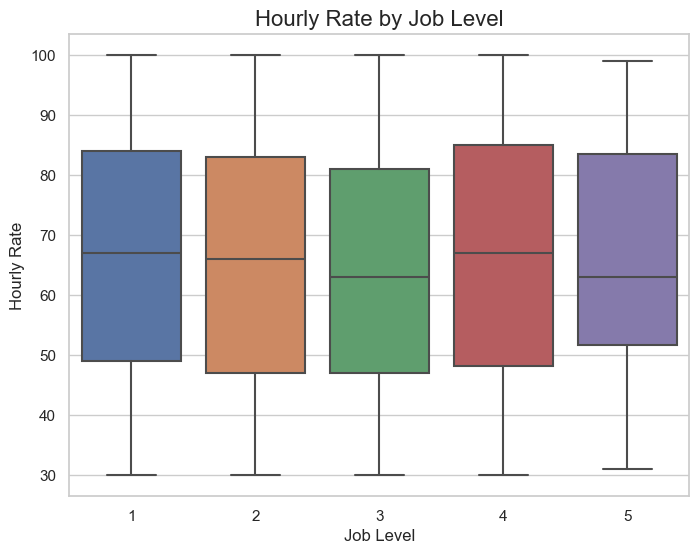

In [211]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EmpJobLevel', y='EmpHourlyRate', data=df)
plt.title('Hourly Rate by Job Level', fontsize=16)
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Hourly Rate', fontsize=12)
plt.show()

## **Observation:**
**1.Education Level**
* Higher Education Levels (especially Doctorate and Other categories) tend to have the highest average hourly rates.
* The average hourly rate across different education levels is fairly similar

**2.Job Level**
* Entry-level employees have the highest average hourly rate (66.65/hour), which is an interesting result as one might expect senior or managerial levels to have the highest rates.
* Mid-level employees have an average hourly rate of 65.99, which is slightly lower than Entry-level employees.
* Senior-level employees (with an average hourly rate of 63.94 have the lowest average hourly rate, which may indicate that employees at this level could be in roles where salary is less dependent on hourly pay (e.g., salaried positions) or the data reflects certain sectors with less competitive pay at the senior level.


## 25.Are employees with higher salaries more likely to stay with the company?

In [116]:
a= df.groupby('Attrition')['EmpHourlyRate'].mean()
print("Average Salary by Attrition Status:")
print(a)

Average Salary by Attrition Status:
Attrition
No     66.203523
Yes    64.707865
Name: EmpHourlyRate, dtype: float64


## **Observation:**
**Higher Salaries Are Associated with Lower Attrition:**
 
* The data indicates that employees who remain with the company generally receive slightly higher salaries than those who depart. Although the difference is minimal, it may suggest that higher salaries correlate with increased employee retention. Enhanced compensation could serve as an incentive to stay, potentially stemming from greater financial stability or satisfaction with the position.

## 26.Are there any gender-based differences in attrition or performance ratings?

In [118]:
a = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()
print("Attrition Rates by Gender:")
print(a)


Attrition Rates by Gender:
Attrition        No       Yes
Gender                       
Female     0.867368  0.132632
Male       0.841379  0.158621


In [386]:
a = df.groupby('Gender')['PerformanceRating'].mean()
print("Average Performance Rating by Gender:")
print(a)


Average Performance Rating by Gender:
Gender
Female    2.949474
Male      2.947586
Name: PerformanceRating, dtype: float64


**By visualisation**

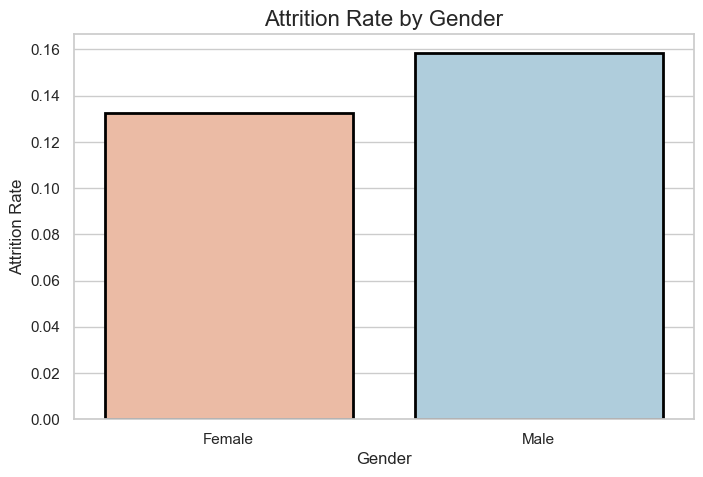

In [120]:
df['AttritionBinary'] = df['Attrition'].map({'Yes': 1, 'No': 0})
a = df.groupby('Gender')['AttritionBinary'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=a.index, y=a.values,palette="RdBu",linewidth=2,edgecolor="black")
plt.title('Attrition Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.show()

## **Observation:**
1.Attrition Rate by Gender

Female Employees:

Remained (Attrition = No): 86.74 percent of female employees remained with the organization.
Terminated (Attrition = Yes): 13.26 percent of female employees left the organization.
Male Employees:

Remained (Attrition = No): 84.14 percent of male employees remained with the organization.
Terminated (Attrition = Yes): 15.86 percent of male employees left the organization.
2.Performance Rating by Gender

The average performance ratings for male and female employees were close to identical, for both had on average an overall rating of around 2.95.
This brings a view that the gender does not seem to impact significantly in performance ratings, for the ratings of the two genders are almost the same

## 27.Does marital status influence job satisfaction or attrition rates?

In [128]:
a= df.groupby('MaritalStatus')['EmpJobSatisfaction'].mean()

print("Average Job Satisfaction by Marital Status:")
print(a)


Average Job Satisfaction by Marital Status:
MaritalStatus
Divorced    2.641791
Married     2.742701
Single      2.781250
Name: EmpJobSatisfaction, dtype: float64


In [132]:
df['AttritionBinary'] = df['Attrition'].map({'Yes': 1, 'No': 0})
b = df.groupby('MaritalStatus')['AttritionBinary'].mean()

print("Attrition Rate by Marital Status:")
print(b)


Attrition Rate by Marital Status:
MaritalStatus
Divorced    0.097015
Married     0.105839
Single      0.244792
Name: AttritionBinary, dtype: float64


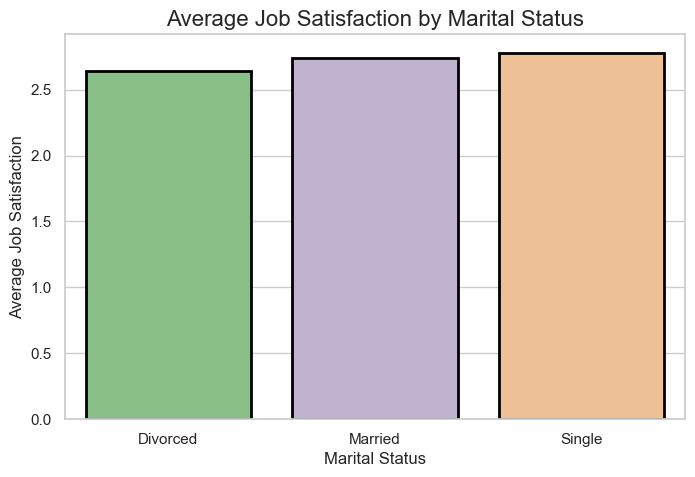

In [130]:
plt.figure(figsize=(8, 5))

sns.barplot(x=a.index, y=a.values,palette='Accent',linewidth=2,edgecolor="black")
plt.title('Average Job Satisfaction by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Job Satisfaction', fontsize=12)
plt.show()



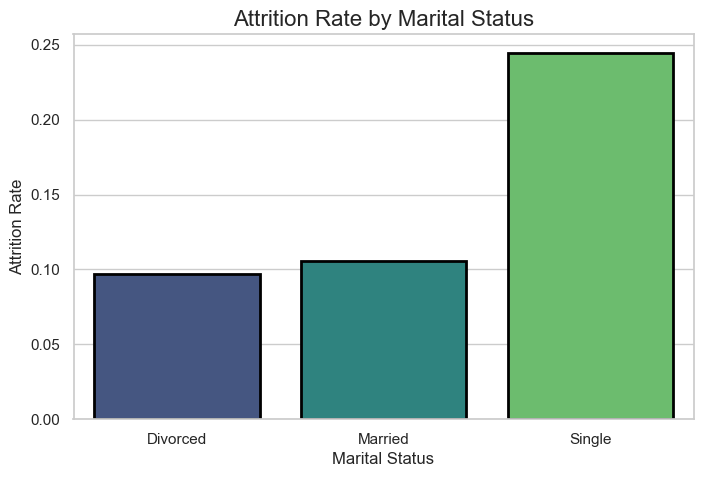

In [134]:

plt.figure(figsize=(8, 5))
sns.barplot(x=b.index, y=b.values,palette='viridis',linewidth=2,edgecolor='black')
plt.title('Attrition Rate by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.show()


## **Observation:**
**1.Job Satisfaction By Marital Status**
1. Job Satisfaction By Marital Status 

Single employees report the highest average job satisfaction at 2.78. This implies that they might find greater fulfillment in their jobs, possibly due to better flexibility, work-life balance, or a stronger emphasis on career growth. The average job satisfaction for married employees is 2.74, which, although lower than that of singles, is still fairly high. This may be attributed to the extra responsibilities that married individuals face, which can influence their work-life balance as they manage family duties. Divorced employees experience the lowest average job satisfaction at 2.64; however, the difference compared to married and single employees is not substantial. This might suggest that divorced individuals face personal challenges, such as emotional upheaval or changes in lifestyle, that could affect their satisfaction at work.
**2.Attrition Rate by Marital Status**
* Employees who are single exhibit the highest rate of turnover at 24.48%, indicating they are more prone to leaving the organization than their married or divorced counterparts.  
* Those who are married show an attrition rate of 10.58%, while divorced employees demonstrate an even slightly lower rate of 9.70%.

## 28.Are certain education backgrounds more prominent in higher job roles or performance ratings?

In [136]:
a = df.groupby('EmpEducationLevel')['EmpJobLevel'].value_counts().unstack()
print("Education Level and Job Level Distribution:")
print(a)


Education Level and Job Level Distribution:
EmpJobLevel          1    2   3   4   5
EmpEducationLevel                      
1                   77   42  16   7   6
2                   79  106  25  17  12
3                  179  137  78  35  20
4                   99  138  46  23  16
5                    6   18   8   8   2


In [140]:
b= df.groupby('EmpEducationLevel')['PerformanceRating'].mean()
print("Average Performance Rating by Education Level:")
print(b)


Average Performance Rating by Education Level:
EmpEducationLevel
1    2.871622
2    2.949791
3    2.986637
4    2.937888
5    2.880952
Name: PerformanceRating, dtype: float64


**By Visualisation**

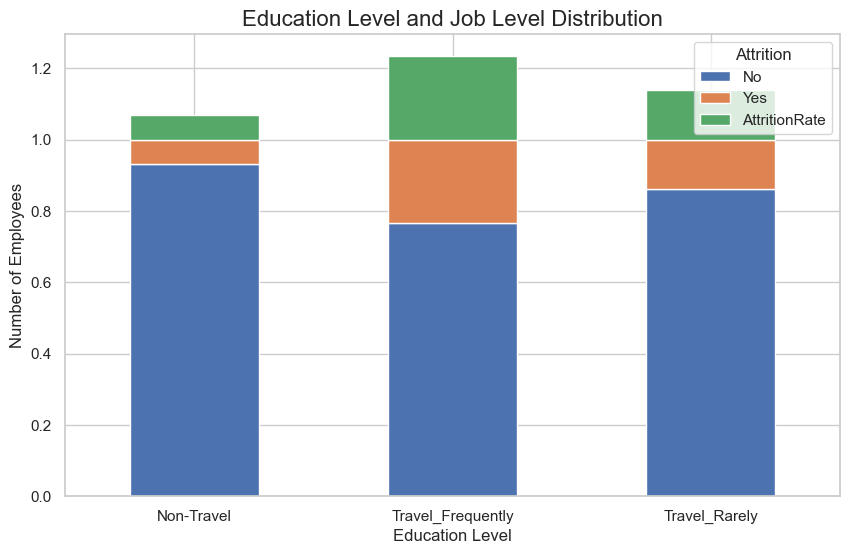

In [213]:
a.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Level and Job Level Distribution', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)
plt.show()


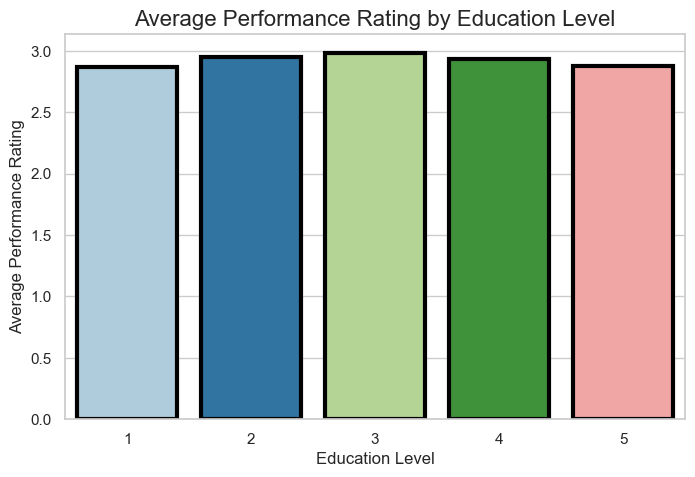

In [215]:
plt.figure(figsize=(8, 5))
sns.barplot(x=b.index, y=b.values,palette='Paired',linewidth=3,edgecolor="black")
plt.title('Average Performance Rating by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Performance Rating', fontsize=12)
plt.show()


## **Observation:**
**1.Education Level and Job level**

* Employees who hold a high school education have mainly been positioned in Job Level 1 with 77 employees followed by 42 employees at Job Level 2. The few employees who are high school-educated and holding level 4 or 5 are minimal. It can, therefore, be seen that an employee who holds a high school education is mostly positioned in an entry-level job.
* Employees with an associate degree are spread more evenly across the lower to mid-level positions. The highest concentration is in Job Level 2 (106 employees), followed by Job Level 1 (79 employees). Fewer employees with associate degrees are in higher job levels, though a moderate number do reach Job Level 3 (25 employees) and beyond.
* A significant proportion of employees who have a bachelor's degree (level 3) are on Job Levels 1 and 2, and there are 179 employees at Job Level 1 and 137 at Job Level 2. However, there is a considerable number at higher job levels, that is, level 3 and above, with 78 employees on Job Level 3, 35 on Job Level 4, and 20 on Job Level 5. This indicates that a bachelor's degree gives better prospects for an employee to go up to the mid-level and senior levels.
* Employees with a master's degree (level 4) follow the same trend as those with a bachelor's degree, though in a significant number, employees fall under Job Level 2 with 138 and Job Level 3 with 46. Nonetheless, the proportion of employees at Job Level 4 and 5 is not insignificant, and the master's degree holder has a higher tendency to move up into mid-to-senior level positions compared to the bachelor's degree holder.
* The least number of employees were PhD holders in the dataset: 6 were in Job Level 1, and 18 were in Job Level 2. The number of PhD holders was extremely low in the higher job levels: 8 in Job Level 3, 8 in Job Level 4, and only 2 in Job Level 5. This indicates that although PhD holders may have highly specialized knowledge, they are relatively scarce in the dataset and tend to be less concentrated in higher job levels.
  
**2. Performance Rating By Education Level**

* High School graduates (education level 1) and PhD holders (education level 5) have relatively lower average performance ratings (2.87 and 2.88, respectively).
* Master's degree holders or those with a Master's level of education level 4 are rated at 2.94 on average performance. This rating is slightly low compared to Bachelor's degree holders but still reasonably high.

## 29.Analyse the realtion between age and expeirnce years at this company

In [146]:
correlation = df['Age'].corr(df['ExperienceYearsAtThisCompany'])
print("correlation between Age and Years at the Company:",correlation)


correlation between Age and Years at the Company: 0.31885152268184924


**By visualisation**

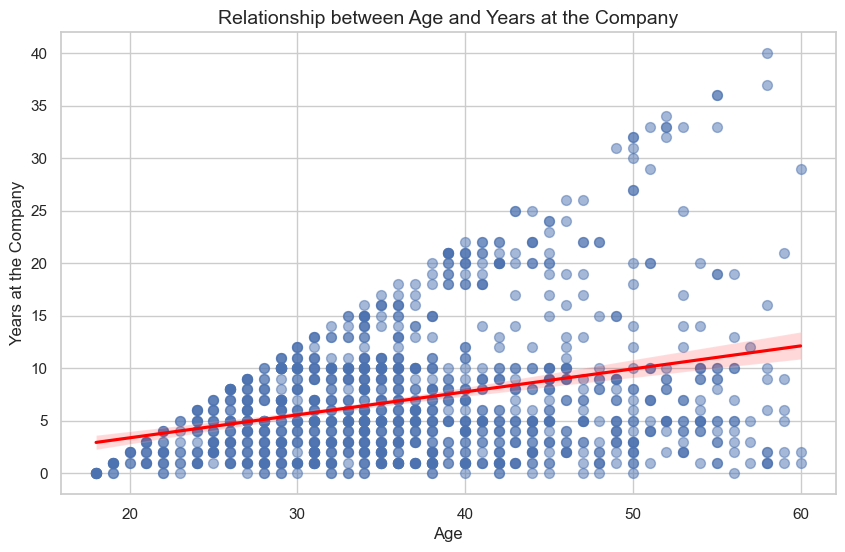

In [150]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='ExperienceYearsAtThisCompany', data=df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Relationship between Age and Years at the Company", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Years at the Company", fontsize=12)
plt.grid(True)
plt.show()

## **Observation:**
 The value of 0.319 suggests a moderate positive relationship between Age and Years at the Company. This means that, generally, older employees tend to have more years of experience at the company.

## 30.Is there a significant relationship between the number of years an employee has worked at the current company (ExperienceYearsAtThisCompany) and their total work experience (TotalWorkExperienceInYears)?

In [152]:
correlation = df['ExperienceYearsAtThisCompany'].corr(df['TotalWorkExperienceInYears'])
print("correlation between ExperienceYearsAtThisCompany and TotalWorkExperienceInYears:",correlation)


correlation between ExperienceYearsAtThisCompany and TotalWorkExperienceInYears: 0.6335547684637624


**By Visualisation**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


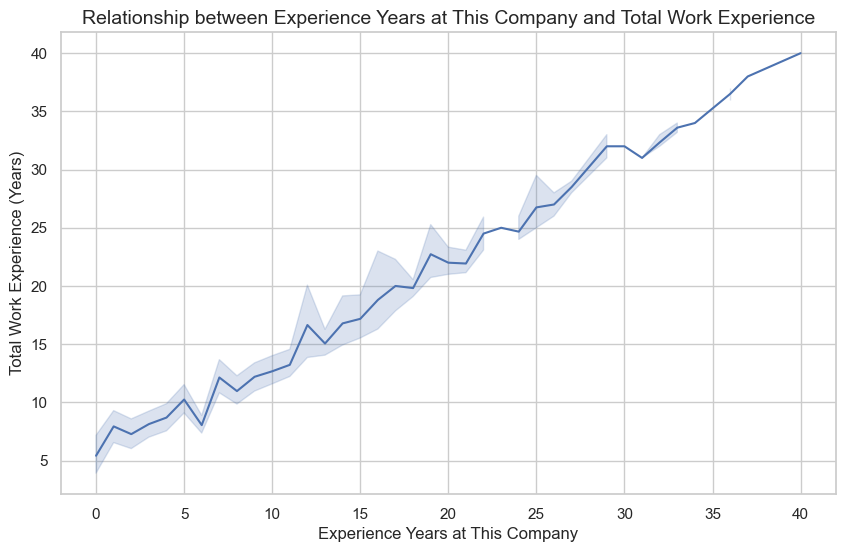

In [154]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=df)
plt.title("Relationship between Experience Years at This Company and Total Work Experience", fontsize=14)
plt.xlabel("Experience Years at This Company", fontsize=12)
plt.ylabel("Total Work Experience (Years)", fontsize=12)
plt.grid(True)
plt.show()

## **Observation:**
* Positive Correlation (0.634): This suggests that, on average, employees with more Total Work Experience tend to have more Experience Years at This Company.
* As Total Work Experience increases, employees are more likely to have spent more time working at their current company.

# 4.UNIVARIATE ANALYSIS

## **1.Age**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


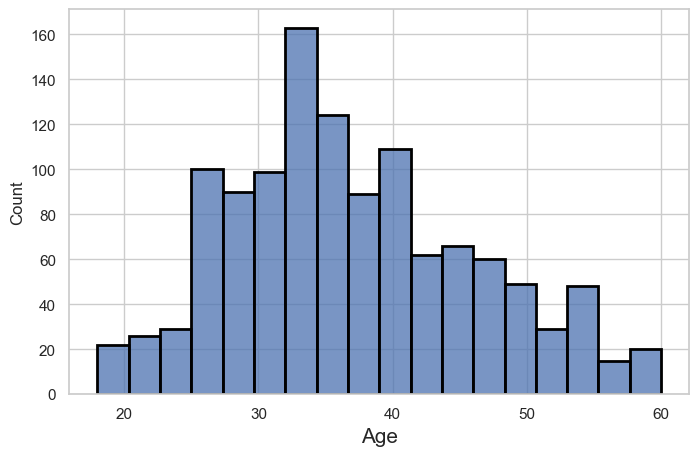

In [156]:
plt.figure(figsize=(8,5))
sns.histplot(x='Age',data=df,linewidth=2,edgecolor="black")
plt.xlabel('Age',fontsize=15)
plt.show()


## **Observation:**
The range of age between 18 to 60, most of the employee age between 25 to 40.

## **2.Employee Hourly Rate**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


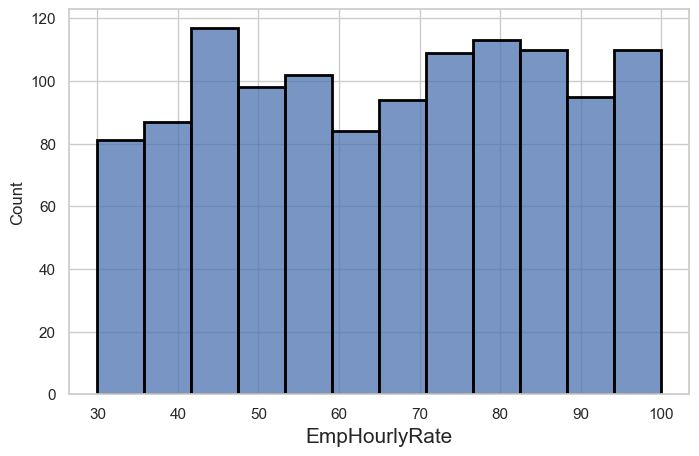

In [158]:
plt.figure(figsize=(8,5))
sns.histplot(x='EmpHourlyRate',data=df,linewidth=2,edgecolor="black")
plt.xlabel('EmpHourlyRate',fontsize=15)
plt.show()

## **Observation:**
The range of employee hourly rate between 30 to 100, most of the employee hourly rate is 45.

## **3.Total Work Experience In Year**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


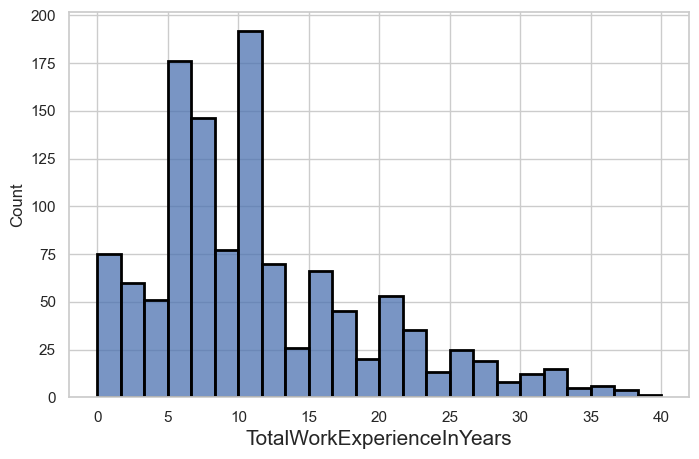

In [160]:
plt.figure(figsize=(8,5))
sns.histplot(x='TotalWorkExperienceInYears',data=df,linewidth=2,edgecolor="black")
plt.xlabel('TotalWorkExperienceInYears',fontsize=15)
plt.show()

## **Observation:**
Work experiance range between 0 to 40,Most of the employee experiance ranges between 5 to 10.

## **4.Experience Years At This Company**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


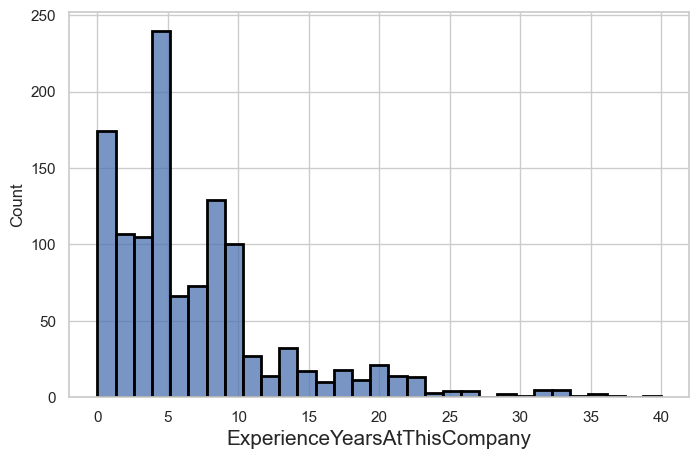

In [162]:
plt.figure(figsize=(8,5))
sns.histplot(x='ExperienceYearsAtThisCompany',data=df,linewidth=2,edgecolor="black")
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=15)
plt.show()

## **Observation:**
The Range of experiance in same comapny is 0 to 40,most of the employee join between 0 to 5

## USE SUBPLOT TO PLOTS MULTIPLE FEATURE


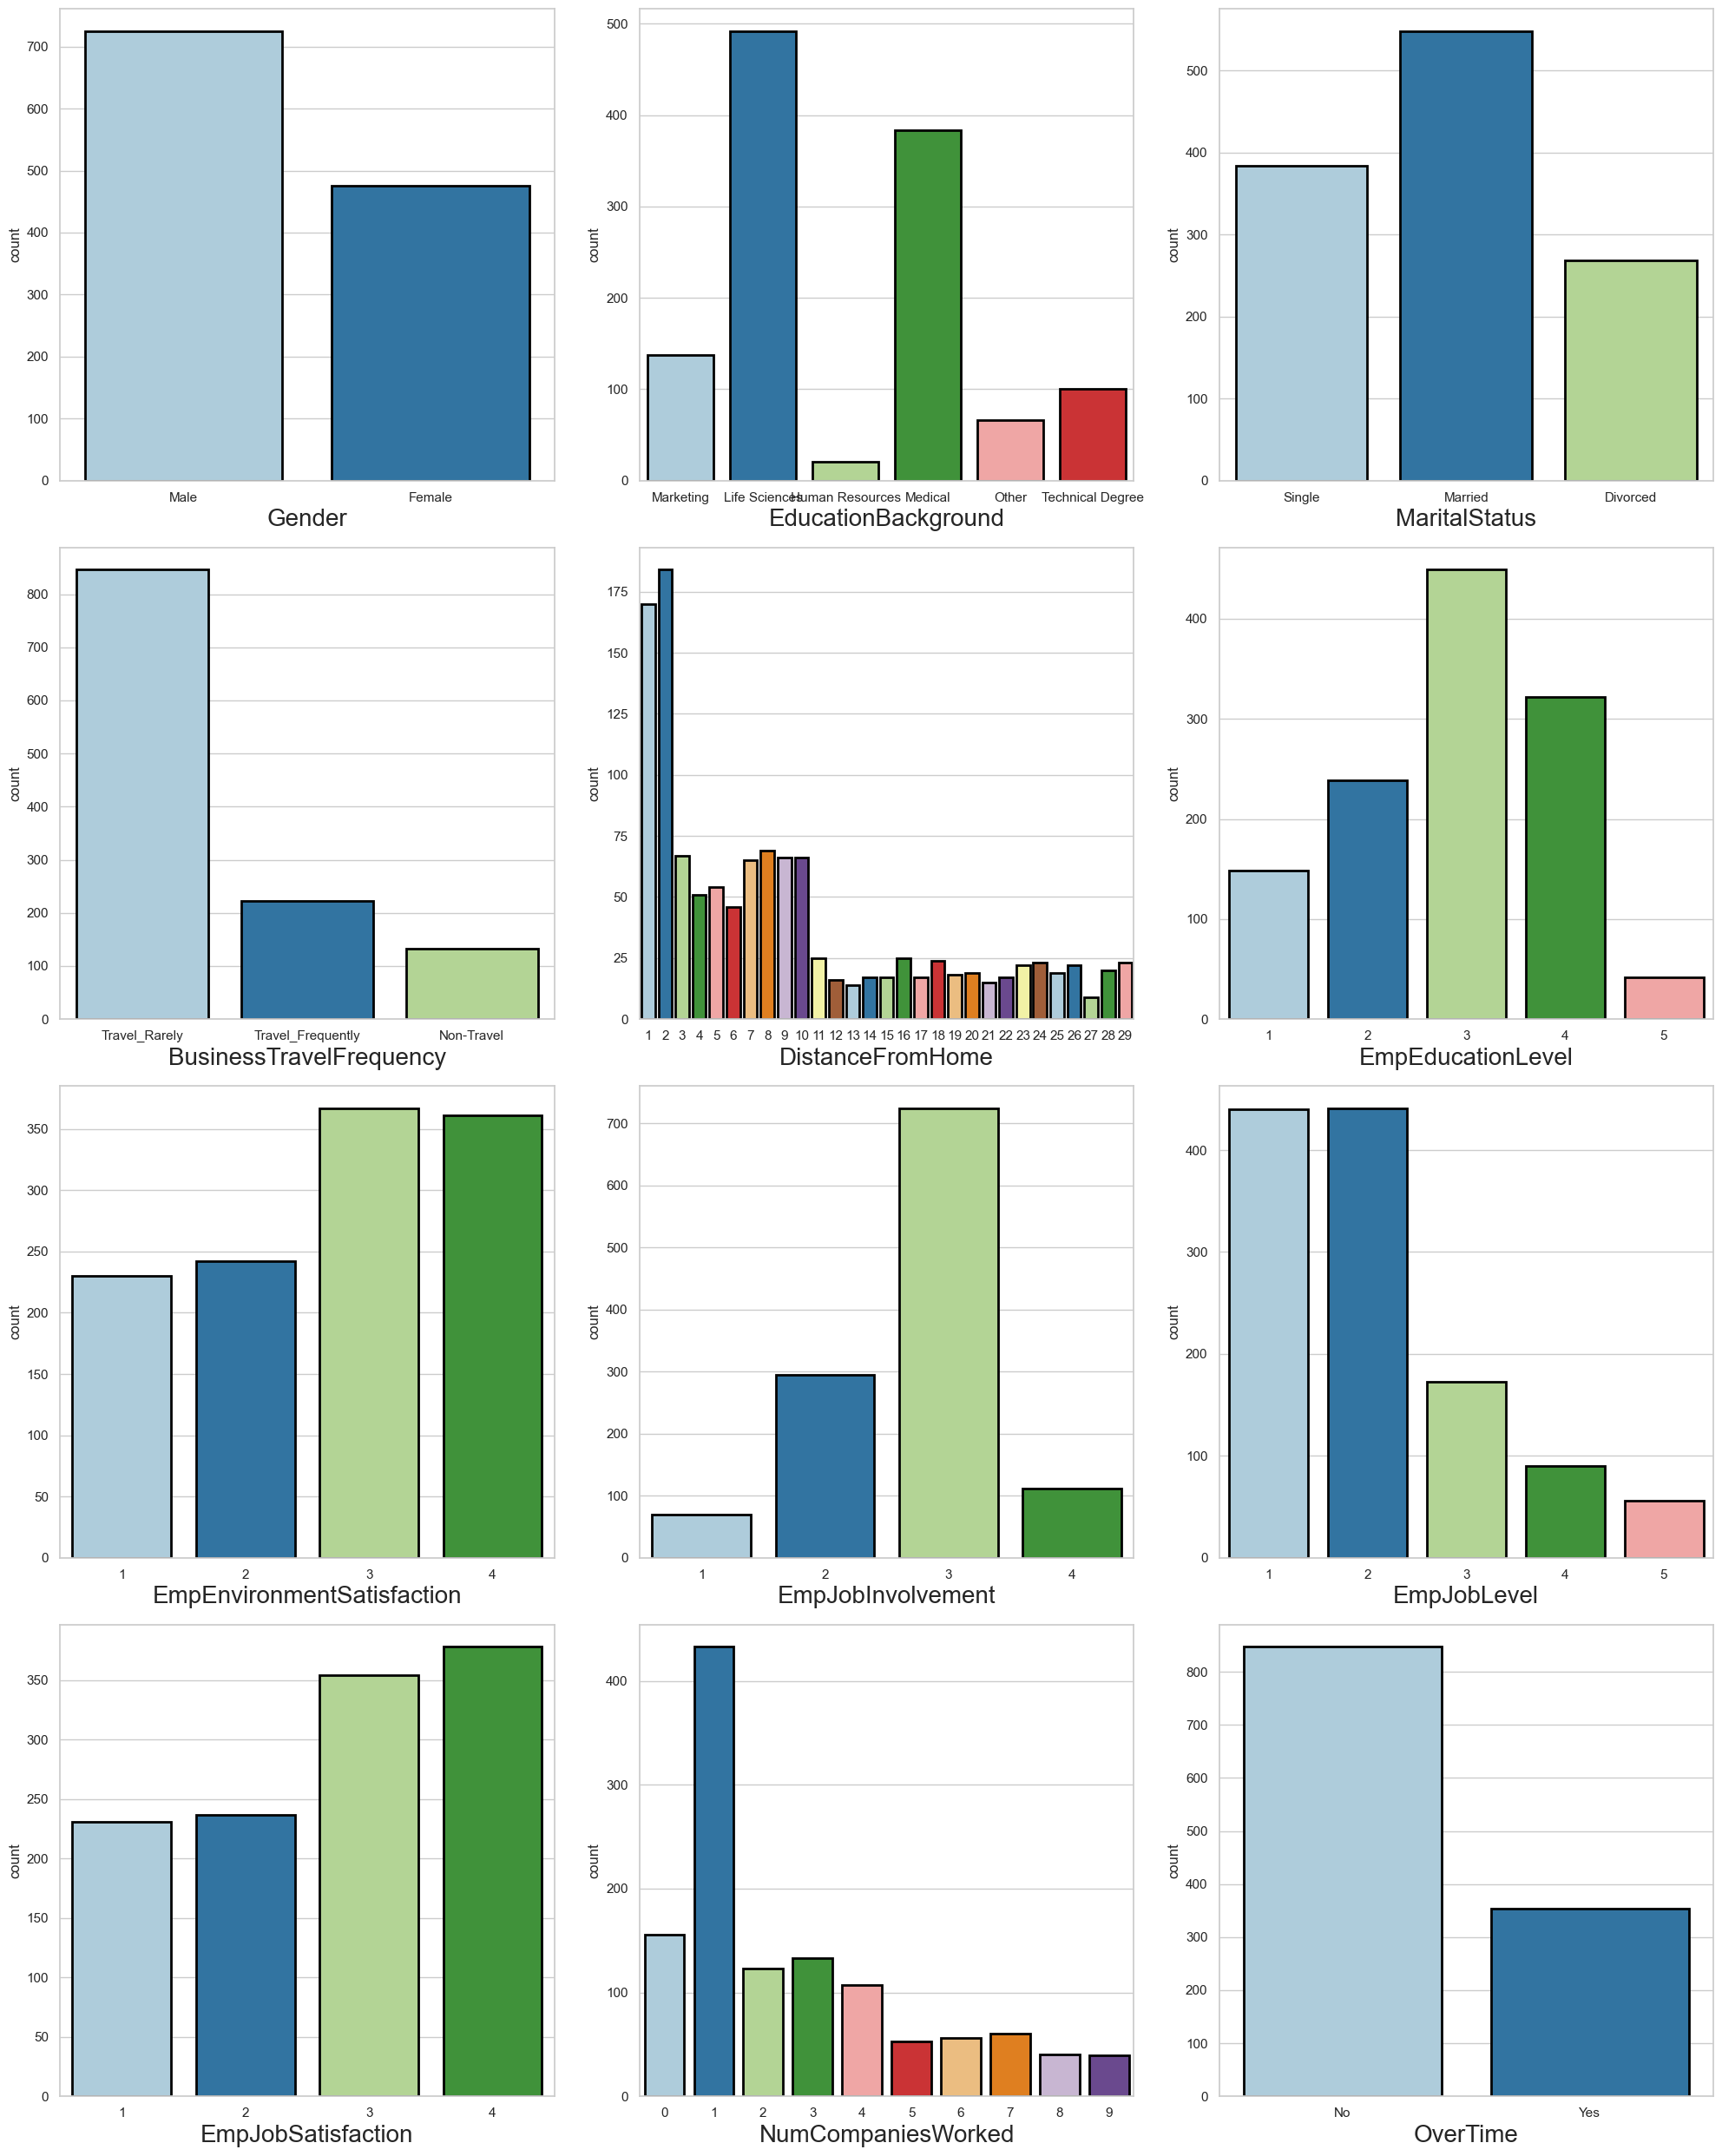

In [164]:
count = df[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] # making lsit of next 12 feature

plt.figure(figsize=(20,25))
plotno = 1 

for column in count: 
    if plotno<=13:   
        plt.subplot(4,3,plotno)
        sns.countplot(x=count[column],palette="Paired",linewidth=2,edgecolor="black") 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() # used to hide the storage loction

## **Observation:**
**5.Gender:**

* Most of the male present in the comapany

**6.Education Background:**

* most of the education background of employee is Life science and medical, as well as marketing eduaction background employee is more than 100.
* other education background employee is less than 100.

**7.MaritalStatus:**

* Most of the employee is married as well as less than 400 employee is single.
* less than 300 employee mariatal status is divorced.

**8.Business Travel Frequency:**
    
* Maximum no of employee travel rarely for company buisness purpose,less than 220 employee travel frequently
* remaining less than 120 employee not travell for buisness purpose.

**9.Distance From Home:**
    
* The range of distance between home to comapny is 1 to 29.
* Maximum no of employee home to company distance is less than 10.

**10.Educational Level:**
    
* Total range of educational level is 1 to 5,Maximum no of employee education level is 3 & 4.
* 2 education level employee is less than 250 and remianing 1 & 5 education level employee is less than 150.

**11.Employee Environment Satisfaction:**
    
* Most of the employee Statisfaction is 3 & 4
* 1 & 2 enviroment satisfaction employee less than 250

**12.Employee Job Involvement:**
    
* Most of the employee job involvement is 3 as well as 2 job involment employee is less than 300.
* Remaining 1 and 4 job involvment employee is less than 100.

**13.Employee Job Level:**
    
* The range of employee job kevel is 1 to 5,most of the employee job level is 1 & 2.
* Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

**14.Employee Job Satisfaction:**
    
* Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.

**15.Number Companies Worked:**
    
* Maximum no of employee work with only one company.
* less no of employee work in more than 5 companies.

**16.Overtime:**
* Most no of employee on doing over time and less than 350 employee doing overtime in company.


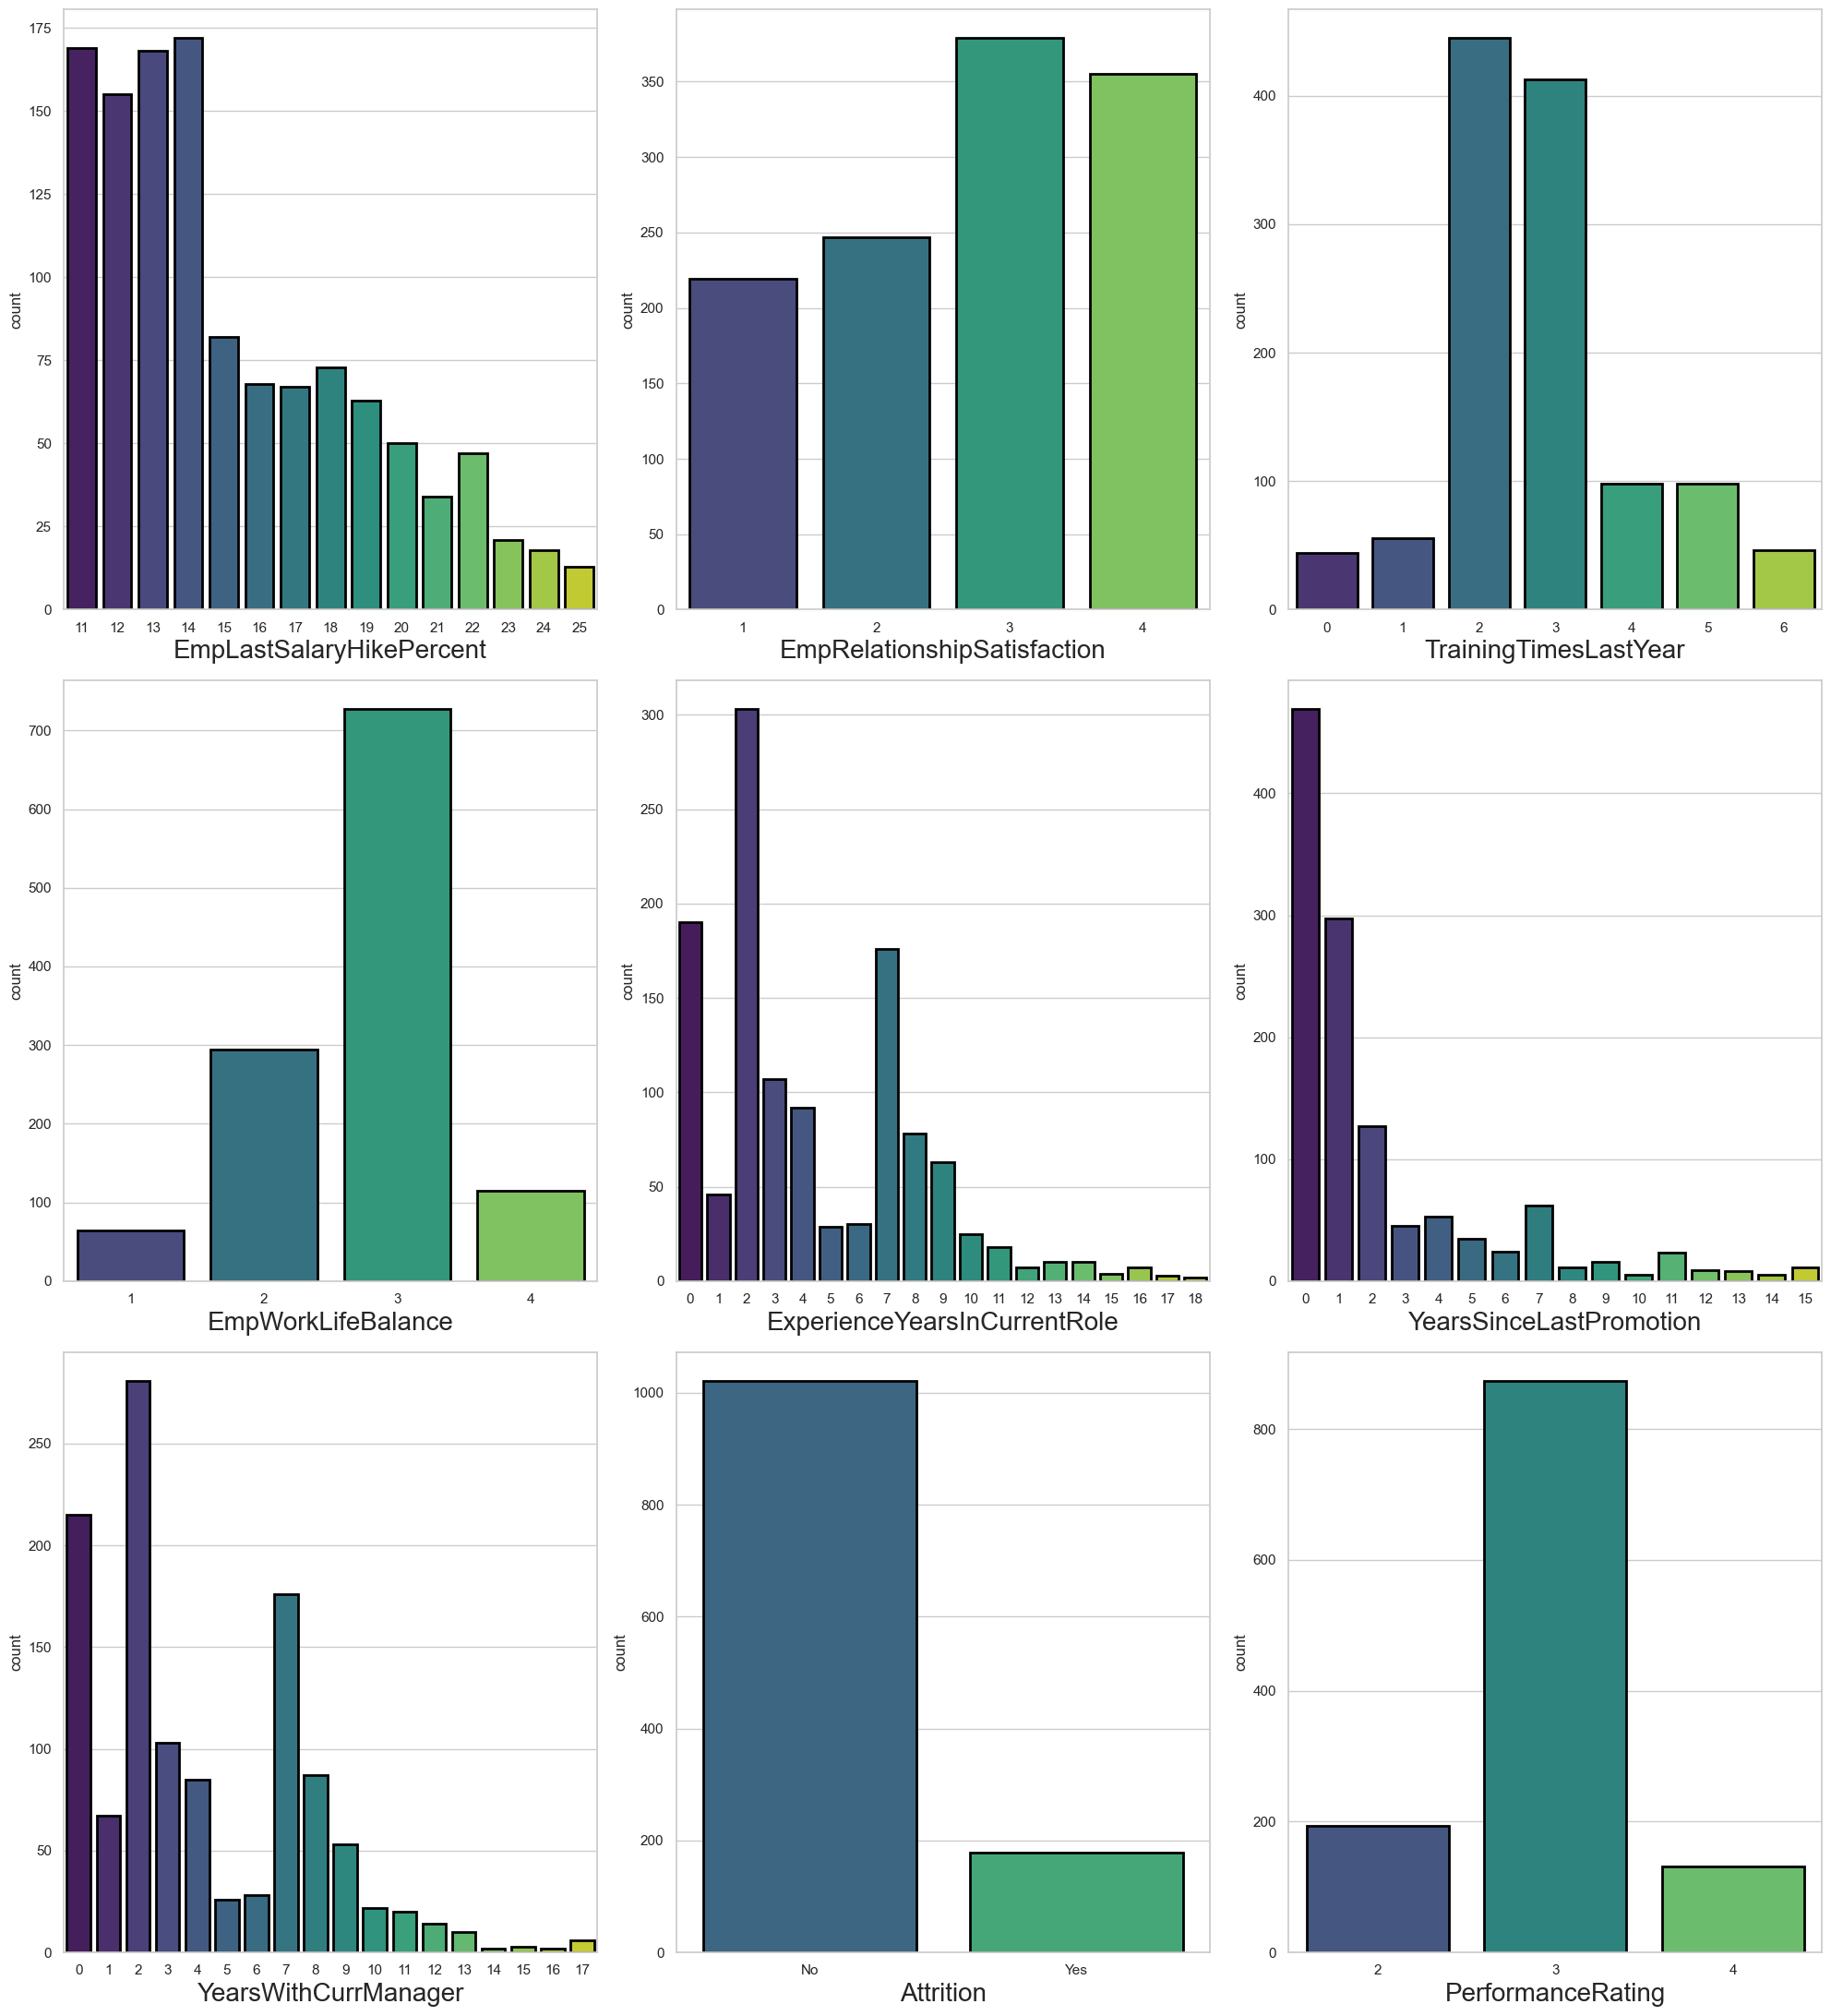

In [166]:
count2 = df[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition', 
               'PerformanceRating']]  
plt.figure(figsize=(20,22))
plotno = 1

for column in count2:
    if plotno<=10:    
        plt.subplot(3,3,plotno) 
        sns.countplot(x=count2[column],palette="viridis",linewidth=2,edgecolor="black") 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 

## **Observation:**

**17.Employee Last Salary Hike Percent:**

* Most no of employee salary hike percentage between 11 to 14%.total range of salary hike is 11 to 25.
* less than 80 employee last salary hike in between 15 to 19.

**18.Employee Relationship Satisfaction:**

* The range of employee relationship satisfaction is 1 to 4,Most of the relation satisfaction is 3 & 4 as well as less than 250 employee with 1 & 2 relationship satisfaction.

**19.Training Times LastYear:**

* The range of training time in last year between 0 to 6, Most of the employee doing 2 & 3 rd time training and remaining all times is less than 100.

**20.Employee Work Life Balance:**

* Most most the work life balance is 3 than less than 300 employee work life balance is 2.
* Minimum work life balance is 1 as well as less than 100 employee work life balance is 4.

**21.Experiance In Current Role:**

* Maximum current role experiance of employee is 18.
* Most of the employee have 2 years of expriance in current role then 7 year of experiance employee is less than 180
less than 200 employee have not current role experiance.

**22.Years Since Last Promotion:**

* The range of year since last promotion is 0 to 15.
* Most of the employee has not promoted in last year less than 300 employee has promoted atleast 1 year.

**23.Years With Current Manager:**

* Most employee have 2 years with current manager and minimum 16 years with current manager.
* The range in between 0 to 17 and less than 180 employee has 7 years with current manager.

**24.Attrition:**

* Maximum no of employee has not leave the company and less than 200 employee has going to leave the company.

**25. Target Feature == Performance Rating:**

* The range of performance rating is 2 to 4, most of the employee have 3 performance ranting and less performance rating is 4.
less than 200 employee has 2 performance rating.

**26.Employee Department**

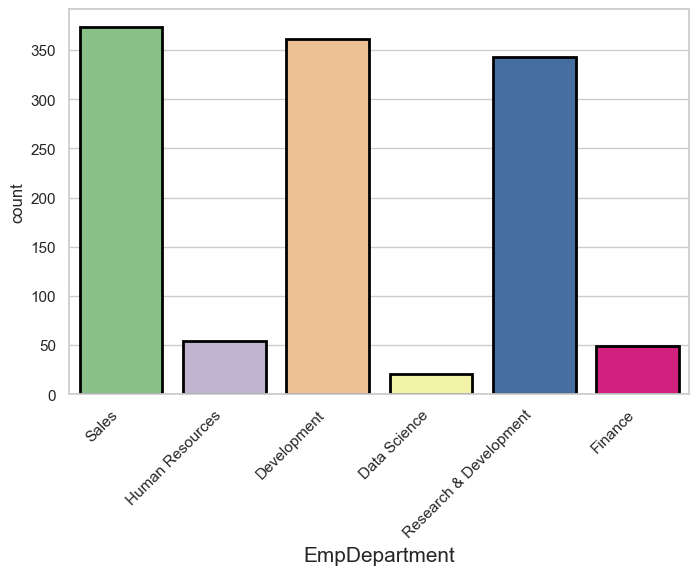

In [168]:
plt.figure(figsize=(8,5))
sns.countplot(x='EmpDepartment',data=df,palette="Accent",linewidth=2,edgecolor="black")
plt.xlabel('EmpDepartment',fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

## **Observation:**

* Most of the employee from sales department as well as Development and research & Development departmnet employee is less than 320
* Human resources & finance department employee is almost equal.
* Data science employee has minimum in company.

**27.Employee Job Role**

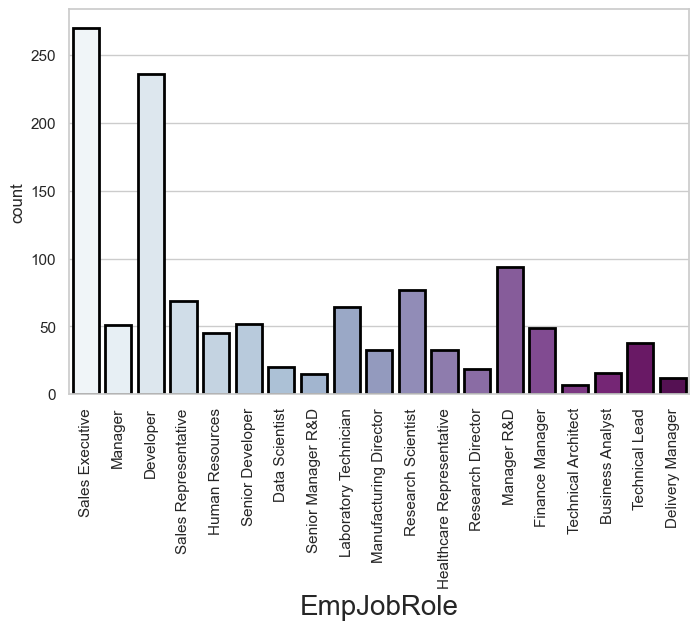

In [170]:
plt.figure(figsize=(8,5))
sns.countplot(x='EmpJobRole',data=df,palette="BuPu",linewidth=2,edgecolor="black")
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.show()

## **Observation:**

* Sales executive employee job role is maximum as well as Developer job role employee count is 230.
* Manage R& D and research scientist employee is less than 100 and remaining all job role employee is less than 65.


# `Project Summary:`

**1. Attrition Analysis:**
* **Attrition Rate:** The data shows that in some departments, such as Sales and Human Resources, the attrition rate is higher than in Finance or Data Science.

* **Factors Affecting Attrition:** JobSatisfaction, WorkLifeBalance, and YearsAtCompany are the major factors that affect the attrition rate. The employees who are not satisfied with their job and have a poor work-life balance are more likely to leave the company.

* **Gender and Marital Status:** Gender and marital status also reveal some differences in attrition rates, with single employees having a higher attrition rate compared to married or divorced employees.

**2. Performance Ratings:**
* The Performance Rating across different Job Roles and Departments reveals some variation, with Technical Leads and Developers having slightly higher average performance ratings.

* Job Satisfaction and Job Level are the most influential factors for Performance Ratings. Employees with higher job satisfaction and at senior job levels tend to have higher performance ratings.

* On average, Data Science and Development employees tend to have slightly better performance ratings than Sales or Human Resources employees.

**3. Work Experience:**
* There is a moderate positive correlation of 0.63 between ExperienceYearsAtThisCompany and TotalWorkExperience, which indicates that the employees who have more years of total work experience tend to stay longer in the company.

* Job Level and Salary are highly correlated. Better performance ratings and higher salaries tend to be associated with higher job levels, although there is some variation based on education and job role.

**4. Salary and Compensation:**
* The average salary tends to be higher for employees in more senior Job Levels and those with more Total Work Experience.

* Salary Hike does not show a very strong correlation with Job Satisfaction, though higher salary hikes are sometimes associated with higher performance levels.

**5.Education and Job Role:**
* Employees with higher education levels (especially those at Level 5) tend to hold more senior positions, with roles such as Manager, Technical Architect, and Research Director being more common among higher education levels.
* Performance Ratings tend to be slightly higher for employees with higher education, but the difference is not drastic.
  
## Conclusion:
The Employee Performance dataset reveals several important trends:

* Job Satisfaction and Work-Life Balance constitute two of the most important reasons that determine either attrition and performance ratings together.

* Total Work Experience and Total Experience at present company are directly proportional to moderate level, which ensures that the staff with higher experience leaves the company.

* Senior job levels are associated with better performance ratings and higher salaries. Employees with a higher education level are more likely to be at senior job levels and earn higher compensation.

* The attrition rates are higher in some departments (for example, Sales), which may indicate a need for focused retention efforts.


